In [1]:
import time
import numpy as np
import pandas as pd
import os
import pickle
import random
import seaborn as sns
import tensorflow as tf

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Input, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Average
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import accuracy_score
from matplotlib import colors as mcolors
cmap = 'viridis'  # or any other valid colormap name
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.colors as mcolors
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.colors as mcolors
from keras.layers import Input, Conv2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Lambda
from keras.regularizers import l2
from keras.layers import UpSampling2D
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score, roc_auc_score
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score
from tensorflow.keras.models import load_model
import tensorflow as tf


# Set seeds for reproducibility
def set_seeds(seed=2023):
    os.environ['__SECRET_PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['__SECRET_TF_DETERMINISTIC_OPS'] = '1'

# Set seeds
set_seeds()

# Define input shapes
input_shape_rgb = (64, 64, 3)
input_shape_greyscale = (64, 64, 1)
NumberofClass = 43  # Number of classes
epochs = 30
img_size = (224, 224)

### Importing dataset

In [2]:
# Load the pickle file
with open('data/data0.pickle', 'rb') as f:
    data0 = pickle.load(f)

In [3]:
# Load the pickle file
with open('data/data1.pickle', 'rb') as f:
    data1 = pickle.load(f)

In [4]:
# Load the pickle file
with open('data/data2.pickle', 'rb') as f:
    data2 = pickle.load(f)

In [5]:
# Load the pickle file
with open('data/data3.pickle', 'rb') as f:
    data3 = pickle.load(f)

In [6]:
# Load the pickle file
with open('data/data4.pickle', 'rb') as f:
    data4 = pickle.load(f)

In [7]:
# Load the pickle file
with open('data/data5.pickle', 'rb') as f:
    data5 = pickle.load(f)

In [8]:
# Load the pickle file
with open('data/data6.pickle', 'rb') as f:
    data6 = pickle.load(f)

In [9]:
# Load the pickle file
with open('data/data7.pickle', 'rb') as f:
    data7 = pickle.load(f)

In [10]:
# Load the pickle file
with open('data/data8.pickle', 'rb') as f:
    data8 = pickle.load(f)

### Inspecting dataset & preliminary analysis

Checking keys

In [11]:
data0.keys(), data1.keys(), data2.keys(), data3.keys(), data4.keys(), data5.keys(), data6.keys(), data7.keys(), data8.keys()  

(dict_keys(['x_test', 'y_validation', 'x_validation', 'labels', 'x_train', 'y_test', 'y_train']),
 dict_keys(['x_train', 'y_test', 'x_test', 'x_validation', 'labels', 'y_train', 'y_validation']),
 dict_keys(['y_test', 'y_validation', 'x_validation', 'x_train', 'y_train', 'labels', 'x_test']),
 dict_keys(['labels', 'y_validation', 'x_test', 'x_validation', 'x_train', 'y_test', 'y_train']),
 dict_keys(['y_validation', 'labels', 'x_validation', 'x_test', 'x_train', 'y_train', 'y_test']),
 dict_keys(['x_test', 'y_test', 'x_train', 'y_train', 'x_validation', 'y_validation', 'labels']),
 dict_keys(['y_train', 'y_validation', 'y_test', 'labels', 'x_train', 'x_validation', 'x_test']),
 dict_keys(['x_train', 'y_test', 'x_validation', 'y_validation', 'labels', 'y_train', 'x_test']),
 dict_keys(['y_validation', 'x_train', 'y_train', 'x_validation', 'labels', 'x_test', 'y_test']))

In [12]:
def extract_data(data):
    # Extracting data from the dictionary
    x_train = data["x_train"]
    x_test = data["x_test"]
    x_val = data["x_validation"]
    y_train = data["y_train"]
    y_val = data["y_validation"]
    y_test = data["y_test"]

    # Printing shapes of the data
    print("x train shape:", data["x_train"].shape)
    print("y train shape:", data["y_train"].shape)
    print("x test shape:", data["x_test"].shape)
    print("y test shape:", data["y_test"].shape)
    print("x validation shape:", data["x_validation"].shape)
    print("y validation shape:", data["y_validation"].shape)

    # Returning the extracted data
    return x_train, x_test, x_val, y_train, y_test, y_val

In [13]:
def swap_axes_grayscale(x_train, x_val, x_test):
    # Swapping axes to convert from (N, C, H, W) to (N, H, W, C)
    x_train = x_train.swapaxes(1, 2).swapaxes(2, 3)
    x_val = x_val.swapaxes(1, 2).swapaxes(2, 3)
    x_test = x_test.swapaxes(1, 2).swapaxes(2, 3)

    # Printing the shapes after swapping
    print("x train shape (grayscale):", x_train.shape)
    print("x val shape (grayscale):", x_val.shape)
    print("x test shape (grayscale):", x_test.shape)

    # Returning the swapped arrays
    return x_train, x_val, x_test


def swap_axes_rgb(x_train, x_val, x_test):
    # Swapping axes to convert from (N, C, H, W) to (N, H, W, C)
    x_train = x_train.swapaxes(1, 3)
    x_val = x_val.swapaxes(1, 3)
    x_test = x_test.swapaxes(1, 3)

    # Printing the shapes after swapping
    print("x train shape (RGB):", x_train.shape)
    print("x val shape (RGB):", x_val.shape)
    print("x test shape (RGB):", x_test.shape)

    # Returning the swapped arrays
    return x_train, x_val, x_test

In [14]:
def visualize_images(x_train):
    # Create a new figure with a specific size
    plt.figure(figsize=(8, 8))

    # Loop through the first 16 images in the dataset
    for i in range(16):
        # Create subplots (4 rows, 4 columns)
        plt.subplot(4, 4, i+1)

        # Check if the image is grayscale or RGB
        if x_train.shape[3] == 1:  # Grayscale image
            plt.imshow(x_train[i].squeeze(), cmap="gray")
        else:  # RGB image
            plt.imshow(x_train[i])

        # Remove axis ticks
        plt.axis("off")

    # Display the plot
    plt.show()

In [15]:
def resize(img):
    # Convert the input image to a TensorFlow tensor of type float32
    img = tf.convert_to_tensor(img, dtype=tf.float32)

    # Resize the image to (64, 64) using bilinear interpolation
    resized_images = tf.image.resize(img, (64, 64))

    # Convert the resized image tensor back to a NumPy array
    return resized_images.numpy()

In [16]:
def one_hot_encode_labels(y_train, y_val, num_classes):
    # Convert y_train, y_val, and y_test to one-hot encoded vectors
    y_train = tf.one_hot(y_train, depth=num_classes)
    y_val = tf.one_hot(y_val, depth=num_classes)
    #y_test = tf.one_hot(y_test, depth=num_classes)

    # Return the one-hot encoded labels
    return y_train, y_val

In [17]:
def process_data(data):
    # Extract data using the provided function
    x_train, x_test, x_val, y_train, y_test, y_val = extract_data(data)

    # Determine whether the dataset is grayscale or RGB
    _is_grayscale = x_train.shape[-1] == 1

    # Swap axes and resize images accordingly
    if _is_grayscale:
        x_train_resized, x_val_resized, x_test_resized = swap_axes_grayscale(x_train, x_val, x_test)
    else:
        x_train_resized, x_val_resized, x_test_resized = swap_axes_rgb(x_train, x_val, x_test)

    # Resize images to (64, 64)
    x_train_resized = resize(x_train_resized)
    x_val_resized = resize(x_val_resized)
    x_test_resized = resize(x_test_resized)

    # Visualize resized images
    #visualize_images(x_train_resized)

    # Print resized shapes
    print("x train resized shape:", x_train_resized.shape)
    print("x validation resized shape:", x_val_resized.shape)
    print("x test resized shape:", x_test_resized.shape)

    # One-hot encode labels
    y_train_encoded = tf.one_hot(y_train, NumberofClass)
    y_val_encoded = tf.one_hot(y_val, NumberofClass)
    #y_test_encoded = tf.one_hot(y_test, NumberofClass)
    
    print("y train resized shape:", y_train_encoded.shape)
    print("y validation resized shape:", y_val_encoded.shape)
    print("y test resized shape:", y_test.shape)
    
    # Return processed data
    return x_train_resized, x_val_resized, x_test_resized, y_train_encoded, y_val_encoded, y_test

## Model Creation

### CNN

#### Data Preprocessing for greysale

##### Storing the datasets in variables

In [18]:
# Process data0
x_train0, x_val0, x_test0, y_train0, y_val0, y_test0 = process_data(data0)
del data0

x train shape: (86989, 3, 32, 32)
y train shape: (86989,)
x test shape: (12630, 3, 32, 32)
y test shape: (12630,)
x validation shape: (4410, 3, 32, 32)
y validation shape: (4410,)
x train shape (RGB): (86989, 32, 32, 3)
x val shape (RGB): (4410, 32, 32, 3)
x test shape (RGB): (12630, 32, 32, 3)
x train resized shape: (86989, 64, 64, 3)
x validation resized shape: (4410, 64, 64, 3)
x test resized shape: (12630, 64, 64, 3)
y train resized shape: (86989, 43)
y validation resized shape: (4410, 43)
y test resized shape: (12630,)


In [19]:
# Process data1
x_train1, x_val1, x_test1, y_train1, y_val1, y_test1 = process_data(data1)
del data1

x train shape: (86989, 3, 32, 32)
y train shape: (86989,)
x test shape: (12630, 3, 32, 32)
y test shape: (12630,)
x validation shape: (4410, 3, 32, 32)
y validation shape: (4410,)
x train shape (RGB): (86989, 32, 32, 3)
x val shape (RGB): (4410, 32, 32, 3)
x test shape (RGB): (12630, 32, 32, 3)
x train resized shape: (86989, 64, 64, 3)
x validation resized shape: (4410, 64, 64, 3)
x test resized shape: (12630, 64, 64, 3)
y train resized shape: (86989, 43)
y validation resized shape: (4410, 43)
y test resized shape: (12630,)


In [20]:
# Process data2
x_train2, x_val2, x_test2, y_train2, y_val2, y_test2 = process_data(data2)
del data2

x train shape: (86989, 3, 32, 32)
y train shape: (86989,)
x test shape: (12630, 3, 32, 32)
y test shape: (12630,)
x validation shape: (4410, 3, 32, 32)
y validation shape: (4410,)
x train shape (RGB): (86989, 32, 32, 3)
x val shape (RGB): (4410, 32, 32, 3)
x test shape (RGB): (12630, 32, 32, 3)
x train resized shape: (86989, 64, 64, 3)
x validation resized shape: (4410, 64, 64, 3)
x test resized shape: (12630, 64, 64, 3)
y train resized shape: (86989, 43)
y validation resized shape: (4410, 43)
y test resized shape: (12630,)


In [21]:
# Process data3
x_train3, x_val3, x_test3, y_train3, y_val3, y_test3 = process_data(data3)
del data3

x train shape: (86989, 3, 32, 32)
y train shape: (86989,)
x test shape: (12630, 3, 32, 32)
y test shape: (12630,)
x validation shape: (4410, 3, 32, 32)
y validation shape: (4410,)
x train shape (RGB): (86989, 32, 32, 3)
x val shape (RGB): (4410, 32, 32, 3)
x test shape (RGB): (12630, 32, 32, 3)
x train resized shape: (86989, 64, 64, 3)
x validation resized shape: (4410, 64, 64, 3)
x test resized shape: (12630, 64, 64, 3)
y train resized shape: (86989, 43)
y validation resized shape: (4410, 43)
y test resized shape: (12630,)


In [22]:
# Process data4
x_train4, x_val4, x_test4, y_train4, y_val4, y_test4 = process_data(data4)
del data4

x train shape: (86989, 1, 32, 32)
y train shape: (86989,)
x test shape: (12630, 1, 32, 32)
y test shape: (12630,)
x validation shape: (4410, 1, 32, 32)
y validation shape: (4410,)
x train shape (RGB): (86989, 32, 32, 1)
x val shape (RGB): (4410, 32, 32, 1)
x test shape (RGB): (12630, 32, 32, 1)
x train resized shape: (86989, 64, 64, 1)
x validation resized shape: (4410, 64, 64, 1)
x test resized shape: (12630, 64, 64, 1)
y train resized shape: (86989, 43)
y validation resized shape: (4410, 43)
y test resized shape: (12630,)


In [23]:
# Process data5
x_train5, x_val5, x_test5, y_train5, y_val5, y_test5 = process_data(data5)
del data5

x train shape: (86989, 1, 32, 32)
y train shape: (86989,)
x test shape: (12630, 1, 32, 32)
y test shape: (12630,)
x validation shape: (4410, 1, 32, 32)
y validation shape: (4410,)
x train shape (RGB): (86989, 32, 32, 1)
x val shape (RGB): (4410, 32, 32, 1)
x test shape (RGB): (12630, 32, 32, 1)
x train resized shape: (86989, 64, 64, 1)
x validation resized shape: (4410, 64, 64, 1)
x test resized shape: (12630, 64, 64, 1)
y train resized shape: (86989, 43)
y validation resized shape: (4410, 43)
y test resized shape: (12630,)


In [24]:
# Process data6
x_train6, x_val6, x_test6, y_train6, y_val6, y_test6 = process_data(data6)
del data6

x train shape: (86989, 1, 32, 32)
y train shape: (86989,)
x test shape: (12630, 1, 32, 32)
y test shape: (12630,)
x validation shape: (4410, 1, 32, 32)
y validation shape: (4410,)
x train shape (RGB): (86989, 32, 32, 1)
x val shape (RGB): (4410, 32, 32, 1)
x test shape (RGB): (12630, 32, 32, 1)
x train resized shape: (86989, 64, 64, 1)
x validation resized shape: (4410, 64, 64, 1)
x test resized shape: (12630, 64, 64, 1)
y train resized shape: (86989, 43)
y validation resized shape: (4410, 43)
y test resized shape: (12630,)


In [25]:
# Process data7
x_train7, x_val7, x_test7, y_train7, y_val7, y_test7 = process_data(data7)
del data7

x train shape: (86989, 1, 32, 32)
y train shape: (86989,)
x test shape: (12630, 1, 32, 32)
y test shape: (12630,)
x validation shape: (4410, 1, 32, 32)
y validation shape: (4410,)
x train shape (RGB): (86989, 32, 32, 1)
x val shape (RGB): (4410, 32, 32, 1)
x test shape (RGB): (12630, 32, 32, 1)
x train resized shape: (86989, 64, 64, 1)
x validation resized shape: (4410, 64, 64, 1)
x test resized shape: (12630, 64, 64, 1)
y train resized shape: (86989, 43)
y validation resized shape: (4410, 43)
y test resized shape: (12630,)


In [26]:
# Process data8
x_train8, x_val8, x_test8, y_train8, y_val8, y_test8 = process_data(data8)
del data8

x train shape: (86989, 1, 32, 32)
y train shape: (86989,)
x test shape: (12630, 1, 32, 32)
y test shape: (12630,)
x validation shape: (4410, 1, 32, 32)
y validation shape: (4410,)
x train shape (RGB): (86989, 32, 32, 1)
x val shape (RGB): (4410, 32, 32, 1)
x test shape (RGB): (12630, 32, 32, 1)
x train resized shape: (86989, 64, 64, 1)
x validation resized shape: (4410, 64, 64, 1)
x test resized shape: (12630, 64, 64, 1)
y train resized shape: (86989, 43)
y validation resized shape: (4410, 43)
y test resized shape: (12630,)


#### Training

In [27]:
def create_cnn(input_shape):
    # Initialize a Sequential model
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=input_shape))

    # First convolutional layer
    model.add(Conv2D(filters=16, kernel_size=(2, 2), padding="same", activation="relu", kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())    # Apply batch normalization to stabilize and speed up training
    model.add(Dropout(0.3))            # Dropout regularization to prevent overfitting
    model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling for spatial down-sampling

    # Second convolutional layer
    model.add(Conv2D(filters=32, kernel_size=(2, 2), padding="same", activation="relu", kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolutional layer
    model.add(Conv2D(filters=64, kernel_size=(2, 2), padding="same", activation="relu", kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))            # Increase dropout rate to further reduce overfitting
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Fourth convolutional layer
    model.add(Conv2D(filters=128, kernel_size=(2, 2), padding="same", activation="relu", kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the 3D feature maps to 1D feature vectors
    model.add(Flatten())

    # Fully connected (dense) layer with 512 neurons
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))            # Higher dropout rate for the dense layer

    # Output layer with a number of neurons equal to the number of classes, using softmax activation
    model.add(Dense(NumberofClass, activation='softmax'))

    # Compile the model with categorical crossentropy loss, adam optimizer, and accuracy metric
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    # Print model summary to see the structure and number of parameters
    model.summary()

    return model

In [28]:
def train_cnn_model(model, x_train, y_train, x_val, y_val, model_name):
    # Define callbacks for the model
    early_stopping = EarlyStopping(
        monitor='val_loss', patience=5, min_delta=0.05, restore_best_weights=True)
    checkpoint = ModelCheckpoint(
        f"{model_name}.keras", monitor='val_loss', save_best_only=True, verbose=1)

    # Start timez
    start_time = time.time()

    # Train the model
    history = model.fit(x_train, y_train,
                        validation_data=(x_val, y_val),
                        epochs=40,  # Number of epochs for training
                        batch_size=1024,  # Batch size for training
                        callbacks=[early_stopping, checkpoint])  # Callbacks for early stopping and model checkpointing

    # Calculate training time
    training_time = time.time() - start_time
    print(f"Training time: {training_time:.3f} seconds")

    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.savefig(f'images/{model_name}_accuracy.png')  # Save accuracy plot
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.savefig(f'images/{model_name}_loss.png')  # Save loss plot
    plt.show()

    return history

#### Dataset 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117,595 (4.26 MB)

 Trainable params: 1,116,091 (4.26 MB)

 Non-trainable params: 1,504 (5.88 KB)

Epoch 1/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1838 - loss: 4.3868
Epoch 1: val_loss improved from inf to 3.61567, saving model to CNN_model_0.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.1854 - loss: 4.3767 - val_accuracy: 0.2741 - val_loss: 3.6157
Epoch 2/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6487 - loss: 1.9865
Epoch 2: val_loss improved from 3.61567 to 2.53591, saving model to CNN_model_0.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6494 - loss: 1.9837 - val_accuracy: 0.4943 - val_loss: 2.5359
Epoch 3/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8340 - loss: 1.2311
Epoch 3: val_loss improved from 2.53591 to 1.64767, saving model to CNN_model_0.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.8343 - loss: 1.2298 - val_accuracy: 0.7077 - val_loss: 1.6477
Epoch 4/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9050 - loss: 0.8692
Epoch 4: val_loss improved from 1.64767 to 1.27910, saving model to 

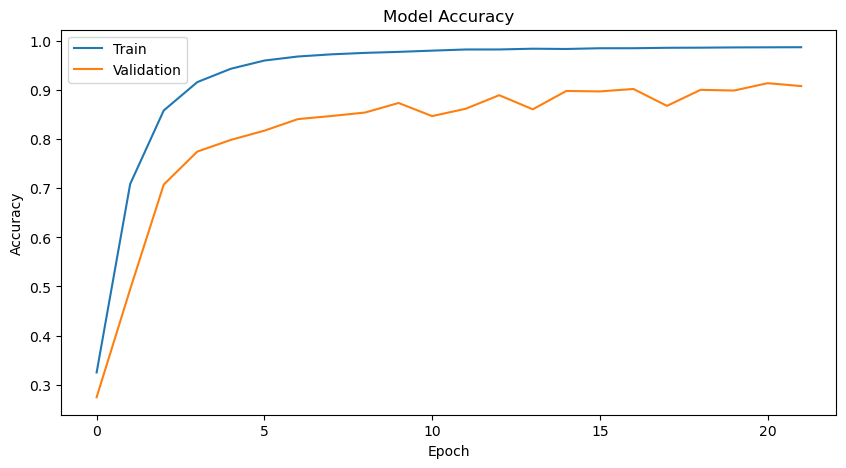

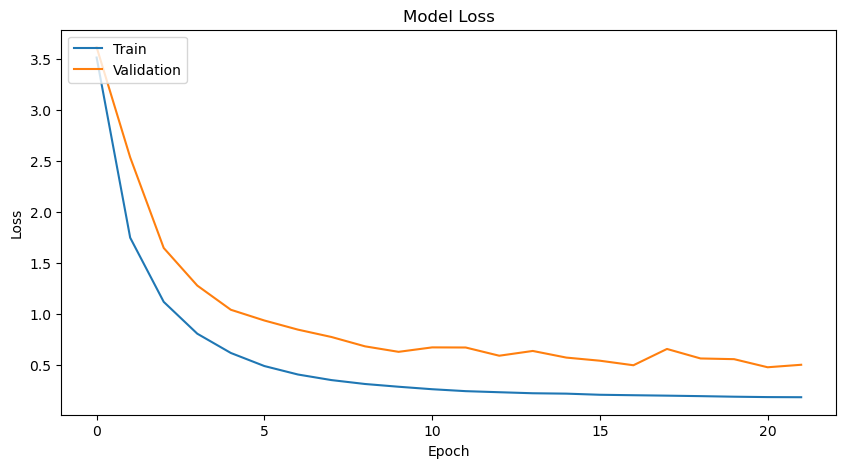

In [29]:
CNN_model_0 = create_cnn(input_shape_rgb)
CNN_model_0_history = train_cnn_model(CNN_model_0, x_train0, y_train0, x_val0, y_val0, "CNN_model_0")
# evaluate_model("ResNet_model_0_1", x_test0, y_test0)
# del x_train0, x_val0, x_test0, y_train0, y_val0, y_test0, ResNet_model1
del CNN_model_0

#### Dataset 1

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 16)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117,595 (4.26 MB)

 Trainable params: 1,116,091 (4.26 MB)

 Non-trainable params: 1,504 (5.88 KB)

Epoch 1/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2285 - loss: 4.1764
Epoch 1: val_loss improved from inf to 5.04168, saving model to CNN_model_1.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.2301 - loss: 4.1663 - val_accuracy: 0.0027 - val_loss: 5.0417
Epoch 2/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 995ms/step - accuracy: 0.6253 - loss: 2.0434
Epoch 2: val_loss improved from 5.04168 to 4.51442, saving model to CNN_model_1.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.6258 - loss: 2.0411 - val_accuracy: 0.0746 - val_loss: 4.5144
Epoch 3/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 992ms/step - accuracy: 0.7886 - loss: 1.3558
Epoch 3: val_loss improved from 4.51442 to 4.26355, saving model to CNN_model_1.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 85s 1000ms/step - accuracy: 0.7889 - loss: 1.3545 - val_accuracy: 0.0909 - val_loss: 4.2636
Epoch 4/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 996ms/step - accuracy: 0.8719 - loss: 0.9653
Epoch 4: val_loss improved from 4.26355 to 4.04378, sav

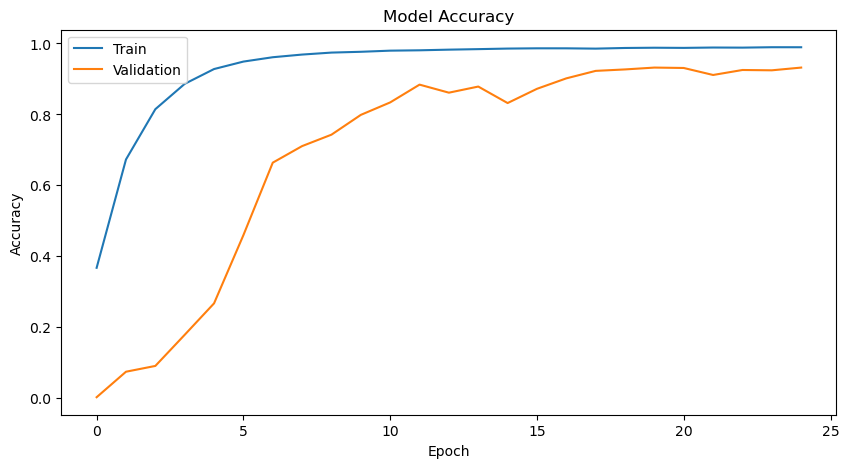

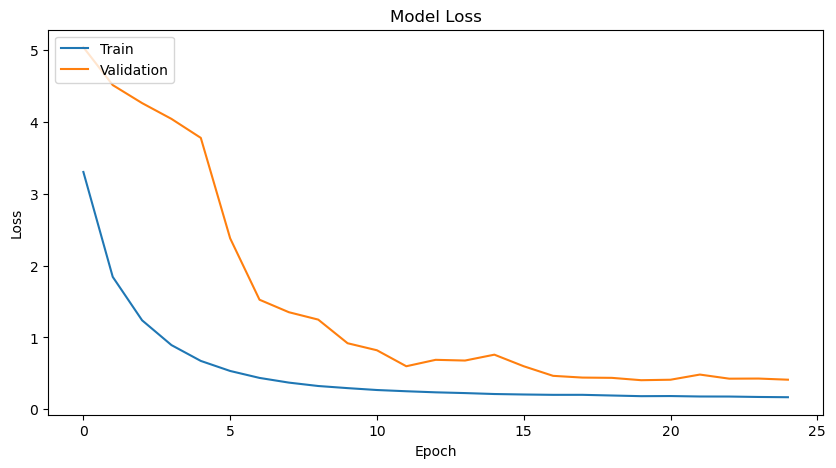

In [30]:
CNN_model_1 = create_cnn(input_shape_rgb)
CNN_model_1_history = train_cnn_model(CNN_model_1, x_train1, y_train1, x_val1, y_val1, "CNN_model_1")
#evaluate_model("ResNet_model_1_1", x_test1, y_test1)
#del x_train1, x_val1, x_test1, y_train1, y_val1, y_test1, ResNet_model2
del CNN_model_1

#### Dataset 2

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 16)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117,595 (4.26 MB)

 Trainable params: 1,116,091 (4.26 MB)

 Non-trainable params: 1,504 (5.88 KB)

Epoch 1/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2610 - loss: 3.9910   
Epoch 1: val_loss improved from inf to 5.37497, saving model to CNN_model_2.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.2630 - loss: 3.9801 - val_accuracy: 0.0705 - val_loss: 5.3750
Epoch 2/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 964ms/step - accuracy: 0.7303 - loss: 1.7087
Epoch 2: val_loss did not improve from 5.37497
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 971ms/step - accuracy: 0.7308 - loss: 1.7067 - val_accuracy: 0.0476 - val_loss: 6.6014
Epoch 3/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 961ms/step - accuracy: 0.8506 - loss: 1.1627
Epoch 3: val_loss did not improve from 5.37497
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 968ms/step - accuracy: 0.8508 - loss: 1.1617 - val_accuracy: 0.0476 - val_loss: 7.5482
Epoch 4/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 974ms/step - accuracy: 0.9041 - loss: 0.8670
Epoch 4: val_loss did not improve from 5.37497
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 981ms/step - accuracy: 0.9042 - loss: 0.8664 - val_

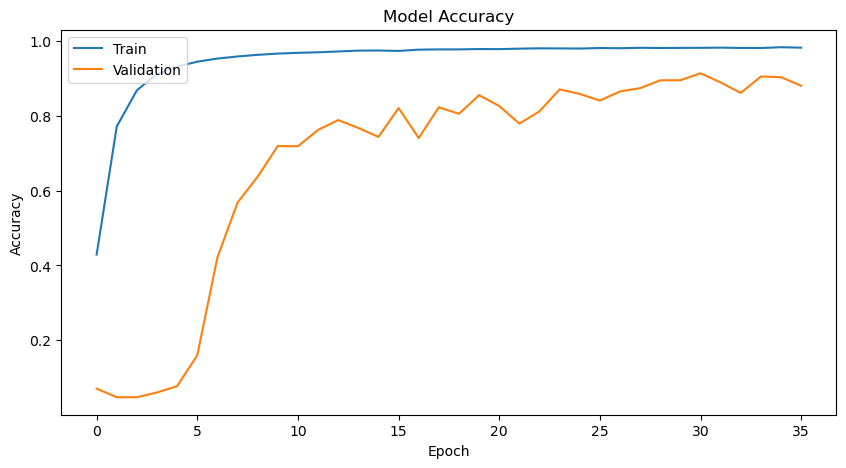

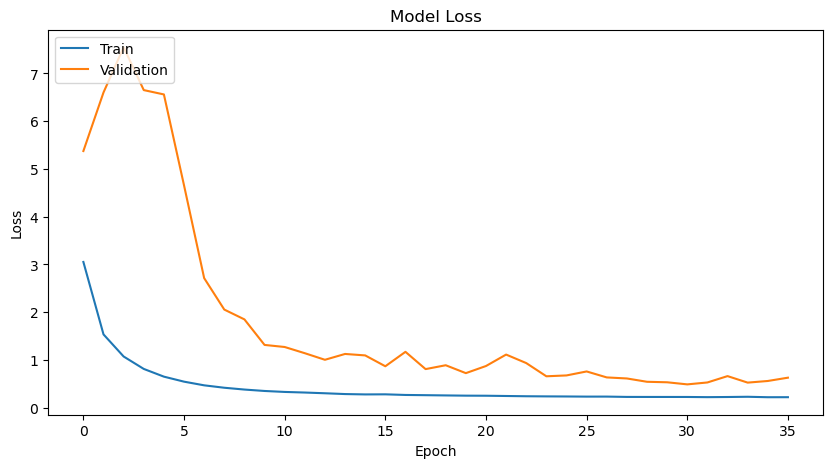

In [31]:
CNN_model_2 = create_cnn(input_shape_rgb)
CNN_model_2_history = train_cnn_model(CNN_model_2, x_train2, y_train2, x_val2, y_val2, "CNN_model_2")
#evaluate_model("ResNet_model_1_1", x_test1, y_test1)
#del x_train1, x_val1, x_test1, y_train1, y_val1, y_test1, ResNet_model2
del CNN_model_2

#### Dataset 3

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 16)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117,595 (4.26 MB)

 Trainable params: 1,116,091 (4.26 MB)

 Non-trainable params: 1,504 (5.88 KB)

Epoch 1/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 980ms/step - accuracy: 0.2320 - loss: 4.1802
Epoch 1: val_loss improved from inf to 4.74774, saving model to CNN_model_3.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 90s 999ms/step - accuracy: 0.2339 - loss: 4.1691 - val_accuracy: 0.0782 - val_loss: 4.7477
Epoch 2/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - accuracy: 0.7147 - loss: 1.7763
Epoch 2: val_loss improved from 4.74774 to 4.54013, saving model to CNN_model_3.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 978ms/step - accuracy: 0.7152 - loss: 1.7741 - val_accuracy: 0.1100 - val_loss: 4.5401
Epoch 3/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 966ms/step - accuracy: 0.8522 - loss: 1.1866
Epoch 3: val_loss improved from 4.54013 to 3.61945, saving model to CNN_model_3.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 974ms/step - accuracy: 0.8524 - loss: 1.1855 - val_accuracy: 0.2213 - val_loss: 3.6194
Epoch 4/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 960ms/step - accuracy: 0.9022 - loss: 0.8893
Epoch 4: val_loss improved from 3.61945 to 2.680

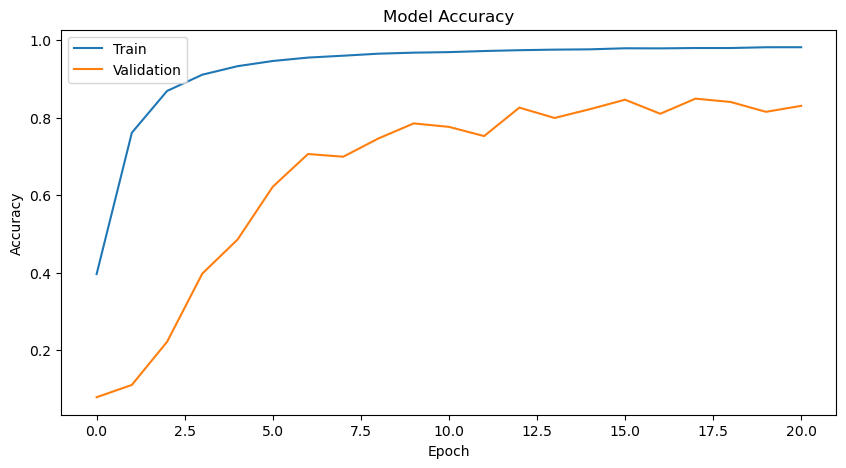

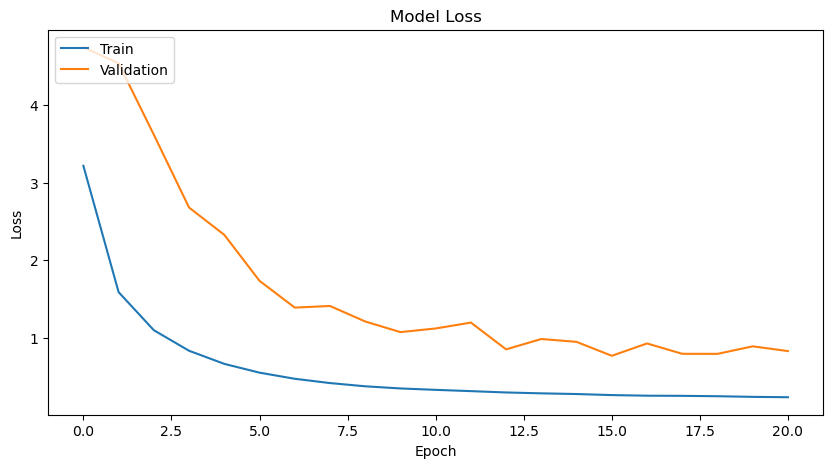

In [32]:
CNN_model_3 = create_cnn(input_shape_rgb)
CNN_model_3_history = train_cnn_model(CNN_model_3, x_train3, y_train3, x_val3, y_val3, "CNN_model_3")
#evaluate_model("ResNet_model_2_1", x_test2, y_test2)
#del x_train2, x_val2, x_test2, y_train2, y_val2, y_test2, ResNet_model3
del CNN_model_3

#### Dataset 4

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 16)     │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117,467 (4.26 MB)

 Trainable params: 1,115,963 (4.26 MB)

 Non-trainable params: 1,504 (5.88 KB)

Epoch 1/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 956ms/step - accuracy: 0.0945 - loss: 4.9852
Epoch 1: val_loss improved from inf to 4.21459, saving model to CNN_model_4.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 85s 967ms/step - accuracy: 0.0956 - loss: 4.9771 - val_accuracy: 0.0832 - val_loss: 4.2146
Epoch 2/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 955ms/step - accuracy: 0.5921 - loss: 2.2684
Epoch 2: val_loss improved from 4.21459 to 2.80309, saving model to CNN_model_4.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 963ms/step - accuracy: 0.5932 - loss: 2.2641 - val_accuracy: 0.4379 - val_loss: 2.8031
Epoch 3/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 972ms/step - accuracy: 0.8503 - loss: 1.1999
Epoch 3: val_loss improved from 2.80309 to 1.46023, saving model to CNN_model_4.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 979ms/step - accuracy: 0.8506 - loss: 1.1987 - val_accuracy: 0.7939 - val_loss: 1.4602
Epoch 4/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 957ms/step - accuracy: 0.9183 - loss: 0.8353
Epoch 4: val_loss improved from 1.46023 to 0.941

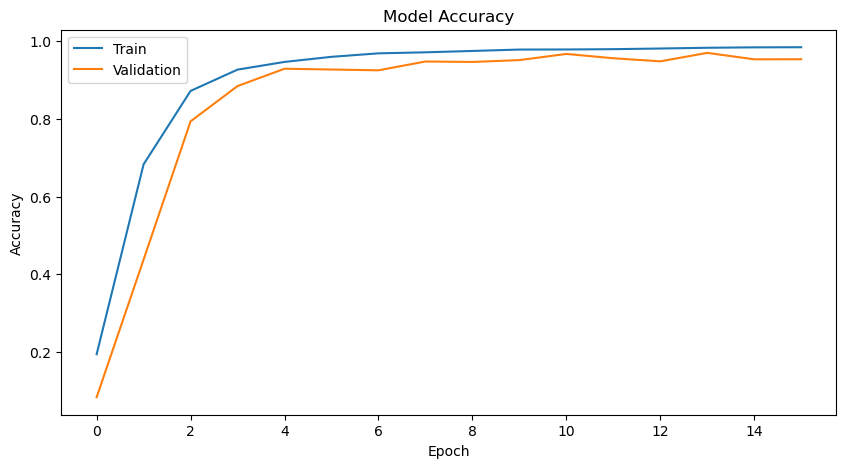

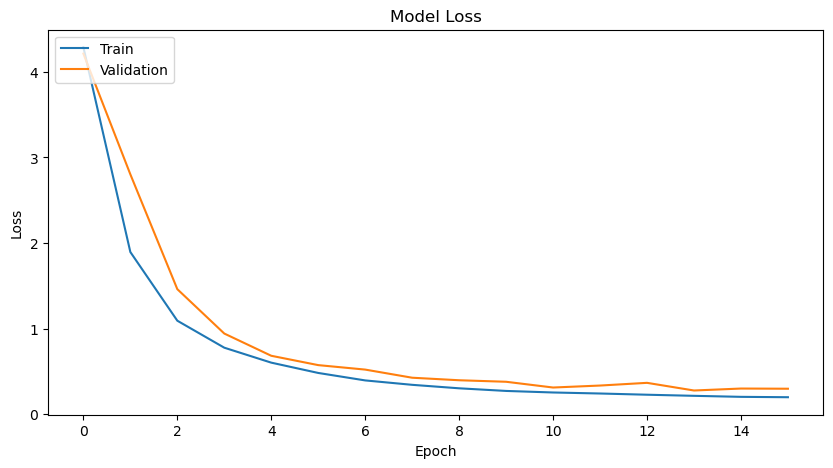

In [33]:
# Train a ResNetModel for RGB datasets
CNN_model_4 = create_cnn(input_shape_greyscale)
# Train and evaluate the model on RGB dataset 4.1
CNN_model_4_history = train_cnn_model(CNN_model_4, x_train4, y_train4, x_val4, y_val4, "CNN_model_4")
# evaluate_model("CNN_model_4_1", x_test4, y_test4)
# del x_train4, x_val4, x_test4, y_train4, y_val4, y_test4, CNN_model2
del CNN_model_4

#### Dataset 5

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 16)     │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117,467 (4.26 MB)

 Trainable params: 1,115,963 (4.26 MB)

 Non-trainable params: 1,504 (5.88 KB)

Epoch 1/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 957ms/step - accuracy: 0.1901 - loss: 4.5100
Epoch 1: val_loss improved from inf to 2.83562, saving model to CNN_model_5.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 85s 969ms/step - accuracy: 0.1924 - loss: 4.4971 - val_accuracy: 0.5347 - val_loss: 2.8356
Epoch 2/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 957ms/step - accuracy: 0.7844 - loss: 1.5666
Epoch 2: val_loss improved from 2.83562 to 1.64823, saving model to CNN_model_5.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 965ms/step - accuracy: 0.7849 - loss: 1.5646 - val_accuracy: 0.8045 - val_loss: 1.6482
Epoch 3/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 960ms/step - accuracy: 0.8920 - loss: 1.0374
Epoch 3: val_loss improved from 1.64823 to 1.15967, saving model to CNN_model_5.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 967ms/step - accuracy: 0.8921 - loss: 1.0364 - val_accuracy: 0.8472 - val_loss: 1.1597
Epoch 4/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 956ms/step - accuracy: 0.9337 - loss: 0.7591
Epoch 4: val_loss improved from 1.15967 to 0.889

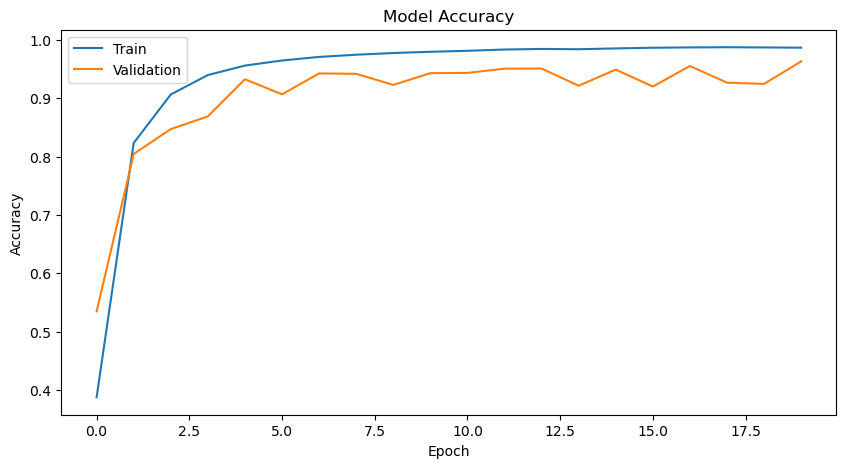

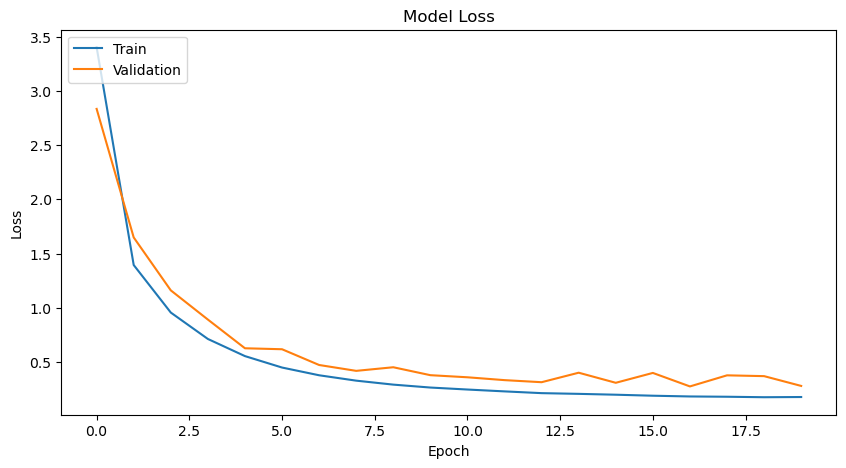

In [34]:
# Train a ResNetModel for RGB datasets
CNN_model_5 = create_cnn(input_shape_greyscale)
# Train and evaluate the model on RGB dataset 5.1
CNN_model_5_history = train_cnn_model(CNN_model_5, x_train5, y_train5, x_val5, y_val5, "CNN_model_5")
# evaluate_model("CNN_model_5_1", x_test5, y_test5)
# del x_train5, x_val5, x_test5, y_train5, y_val5, y_test5, CNN_model3
del CNN_model_5

#### Datset 6

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 64, 64, 16)     │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 8, 8, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117,467 (4.26 MB)

 Trainable params: 1,115,963 (4.26 MB)

 Non-trainable params: 1,504 (5.88 KB)

Epoch 1/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 966ms/step - accuracy: 0.2747 - loss: 4.1494
Epoch 1: val_loss improved from inf to 5.21358, saving model to CNN_model_6.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 86s 979ms/step - accuracy: 0.2771 - loss: 4.1360 - val_accuracy: 0.0068 - val_loss: 5.2136
Epoch 2/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 966ms/step - accuracy: 0.8053 - loss: 1.5020
Epoch 2: val_loss did not improve from 5.21358
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 973ms/step - accuracy: 0.8057 - loss: 1.5003 - val_accuracy: 0.0542 - val_loss: 5.9497
Epoch 3/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 965ms/step - accuracy: 0.9054 - loss: 1.0033
Epoch 3: val_loss did not improve from 5.21358
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 972ms/step - accuracy: 0.9056 - loss: 1.0024 - val_accuracy: 0.0406 - val_loss: 6.3496
Epoch 4/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 964ms/step - accuracy: 0.9428 - loss: 0.7324
Epoch 4: val_loss did not improve from 5.21358
85/85 ━━━━━━━━━━━━━━━━━━━━ 83s 971ms/step - accuracy: 0.9429 - loss: 0.7318 - v

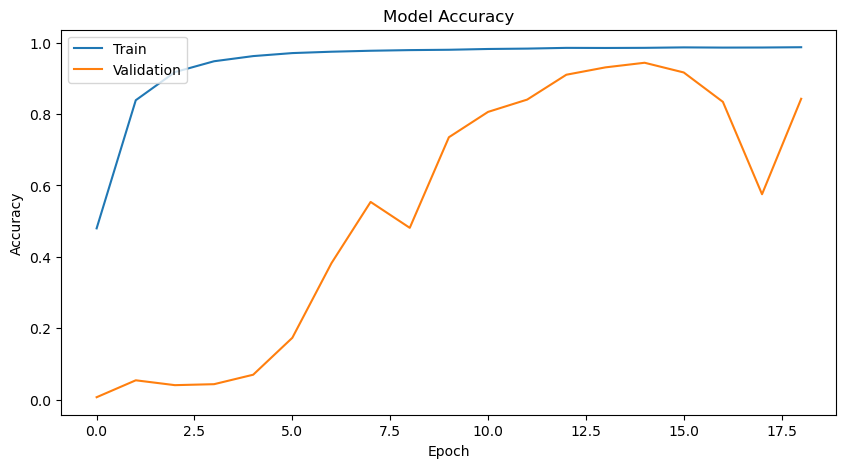

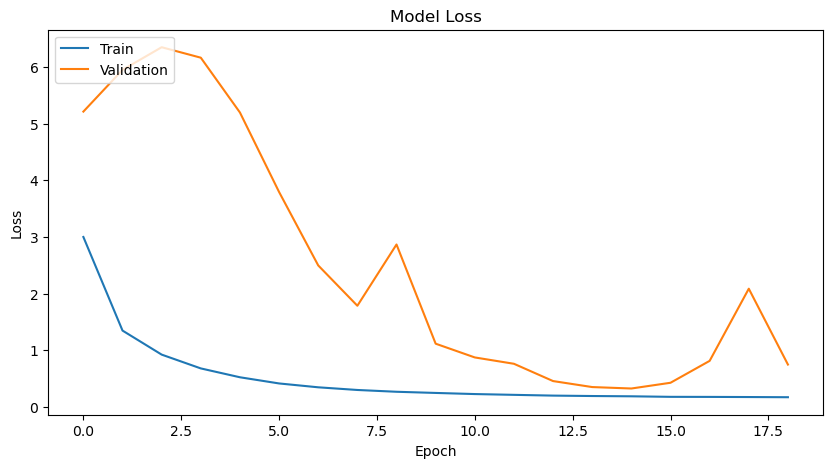

In [35]:
# Train a ResNetModel for RGB datasets
CNN_model_6 = create_cnn(input_shape_greyscale)
# Train and evaluate the model on RGB dataset 5
CNN_model_6_history = train_cnn_model(CNN_model_6, x_train6, y_train6, x_val6, y_val6, "CNN_model_6")
# evaluate_model("CNN_model_6_1", x_test6, y_test6)
# del x_train6, x_val6, x_test6, y_train6, y_val6, y_test6, CNN_model4
del CNN_model_6

#### Datset 7

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 64, 64, 16)     │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 8, 8, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117,467 (4.26 MB)

 Trainable params: 1,115,963 (4.26 MB)

 Non-trainable params: 1,504 (5.88 KB)

Epoch 1/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 964ms/step - accuracy: 0.2952 - loss: 4.0556
Epoch 1: val_loss improved from inf to 5.65579, saving model to CNN_model_7.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 85s 977ms/step - accuracy: 0.2975 - loss: 4.0428 - val_accuracy: 0.0340 - val_loss: 5.6558
Epoch 2/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 962ms/step - accuracy: 0.7846 - loss: 1.5782
Epoch 2: val_loss did not improve from 5.65579
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 969ms/step - accuracy: 0.7849 - loss: 1.5766 - val_accuracy: 0.0116 - val_loss: 5.7877
Epoch 3/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8790 - loss: 1.1028
Epoch 3: val_loss did not improve from 5.65579
85/85 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.8791 - loss: 1.1019 - val_accuracy: 0.0227 - val_loss: 6.2226
Epoch 4/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 976ms/step - accuracy: 0.9189 - loss: 0.8285
Epoch 4: val_loss did not improve from 5.65579
85/85 ━━━━━━━━━━━━━━━━━━━━ 84s 983ms/step - accuracy: 0.9190 - loss: 0.8279 - val_acc

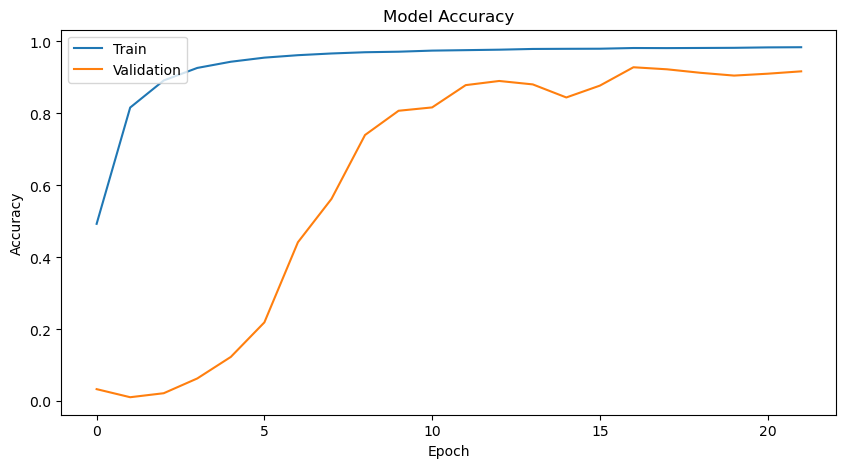

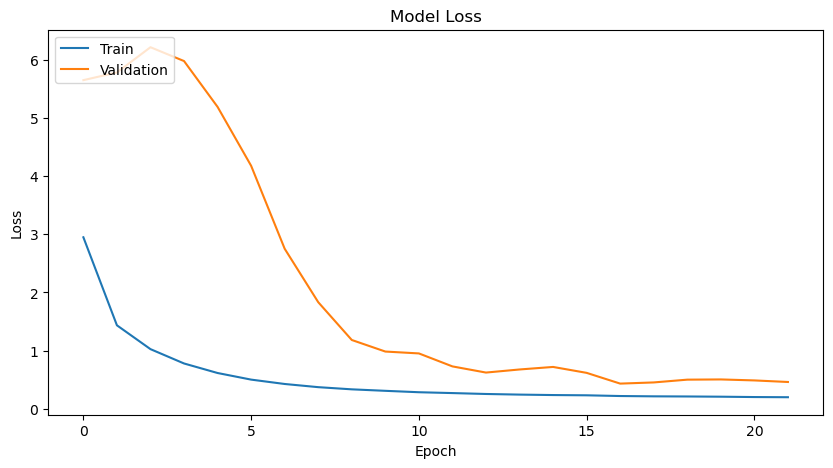

In [36]:
# Train a ResNetModel for RGB datasets
CNN_model_7 = create_cnn(input_shape_greyscale)
# Train and evaluate the model on RGB dataset 5
CNN_model_7_history = train_cnn_model(CNN_model_7, x_train7, y_train7, x_val7, y_val7, "CNN_model_7")
# evaluate_model("CNN_model_7_1", x_test7, y_test7)
# del x_train7, x_val7, x_test7, y_train7, y_val7, y_test7, CNN_model5
del CNN_model_7

#### Dataset 8

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 64, 64, 16)     │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 64, 64, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 32, 32, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 16, 16, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 8, 8, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117,467 (4.26 MB)

 Trainable params: 1,115,963 (4.26 MB)

 Non-trainable params: 1,504 (5.88 KB)

Epoch 1/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 962ms/step - accuracy: 0.2754 - loss: 4.1042
Epoch 1: val_loss improved from inf to 5.07868, saving model to CNN_model_8.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 85s 974ms/step - accuracy: 0.2778 - loss: 4.0912 - val_accuracy: 0.0476 - val_loss: 5.0787
Epoch 2/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 958ms/step - accuracy: 0.7926 - loss: 1.5393
Epoch 2: val_loss improved from 5.07868 to 4.26736, saving model to CNN_model_8.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 966ms/step - accuracy: 0.7929 - loss: 1.5376 - val_accuracy: 0.1132 - val_loss: 4.2674
Epoch 3/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 957ms/step - accuracy: 0.8872 - loss: 1.0660
Epoch 3: val_loss improved from 4.26736 to 3.14851, saving model to CNN_model_8.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 964ms/step - accuracy: 0.8873 - loss: 1.0650 - val_accuracy: 0.3549 - val_loss: 3.1485
Epoch 4/40
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 971ms/step - accuracy: 0.9260 - loss: 0.7946
Epoch 4: val_loss improved from 3.14851 to 2.667

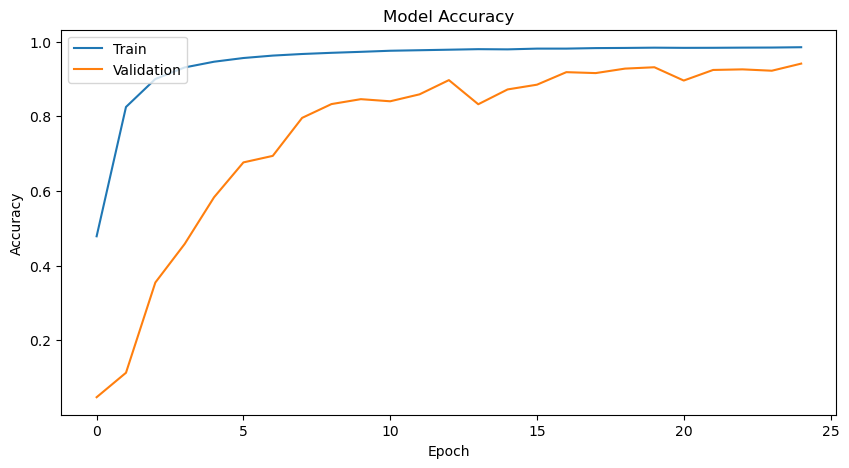

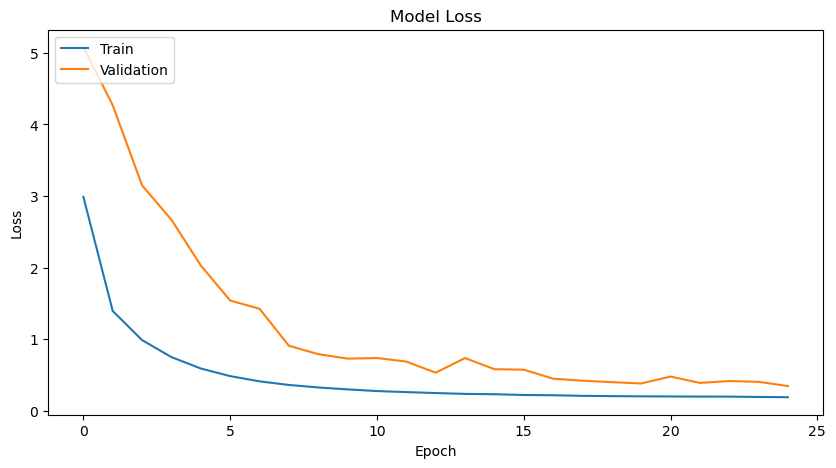

In [37]:
# Train a ResNetModel for RGB datasets
CNN_model_8 = create_cnn(input_shape_greyscale)
# Train and evaluate the model on RGB dataset 5
CNN_model_8_history = train_cnn_model(CNN_model_8, x_train8, y_train8, x_val8, y_val8, "CNN_model_8")
#evaluate_model("CNN_model_8_1", x_test8, y_test8)
#del x_train8, x_val8, x_test8, y_train8, y_val8, y_test8, 
del CNN_model_8

#### Storing the datasets in variables

## Analysis

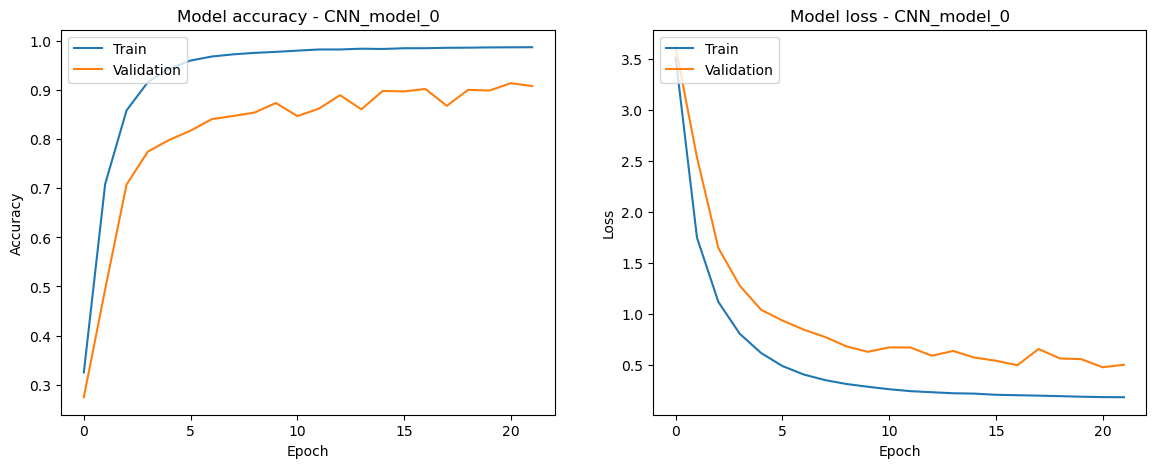

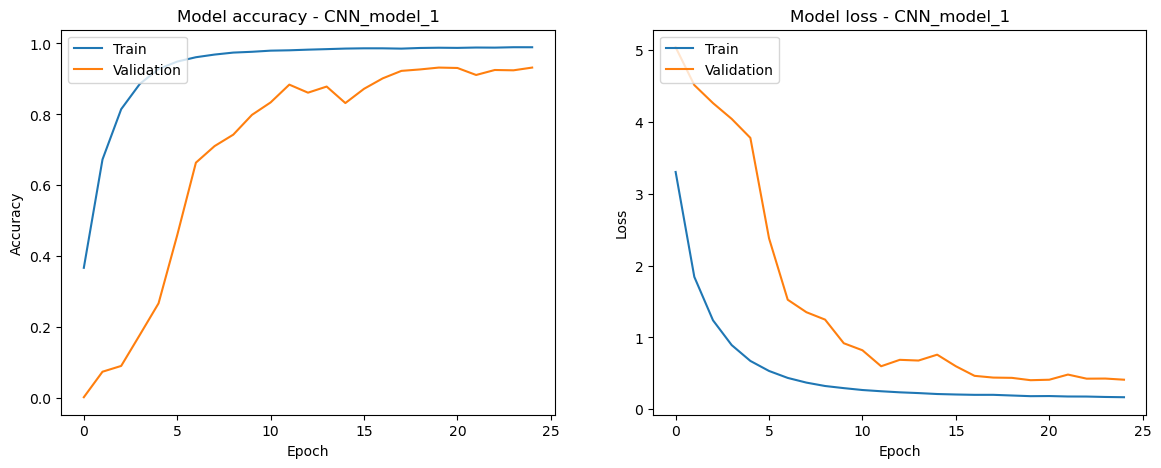

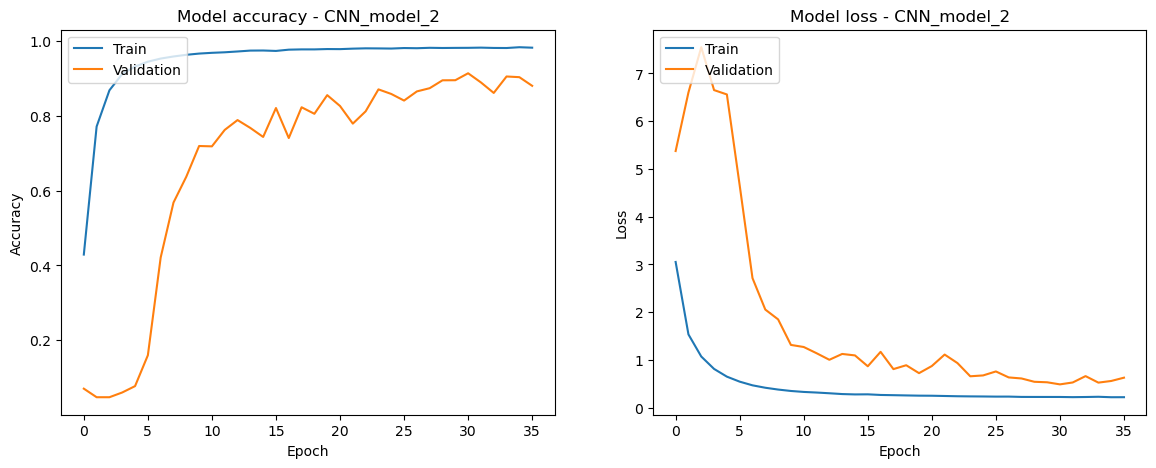

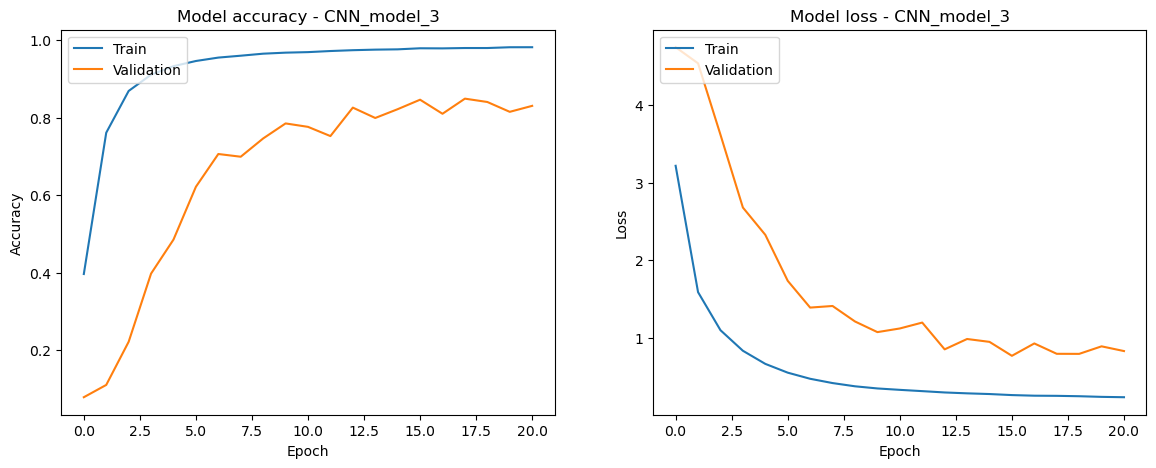

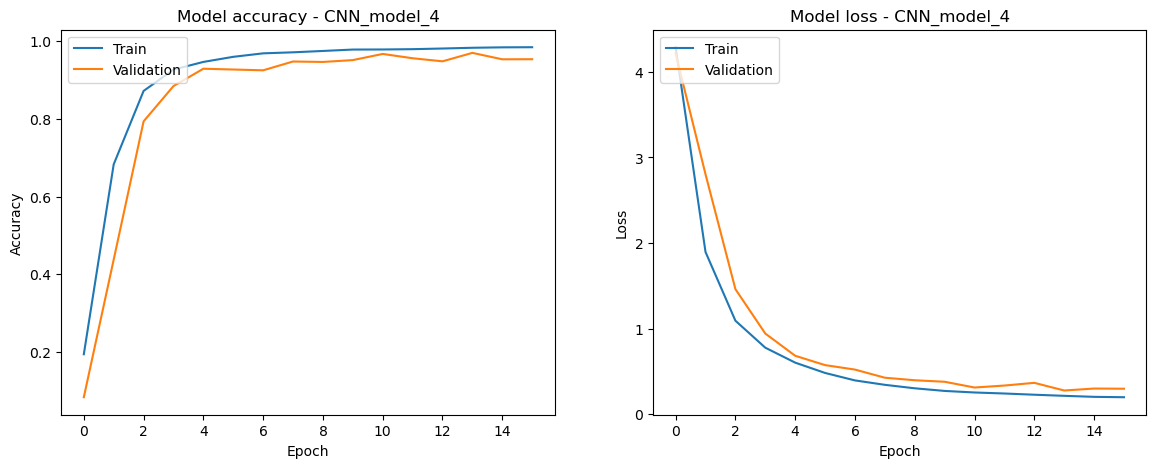

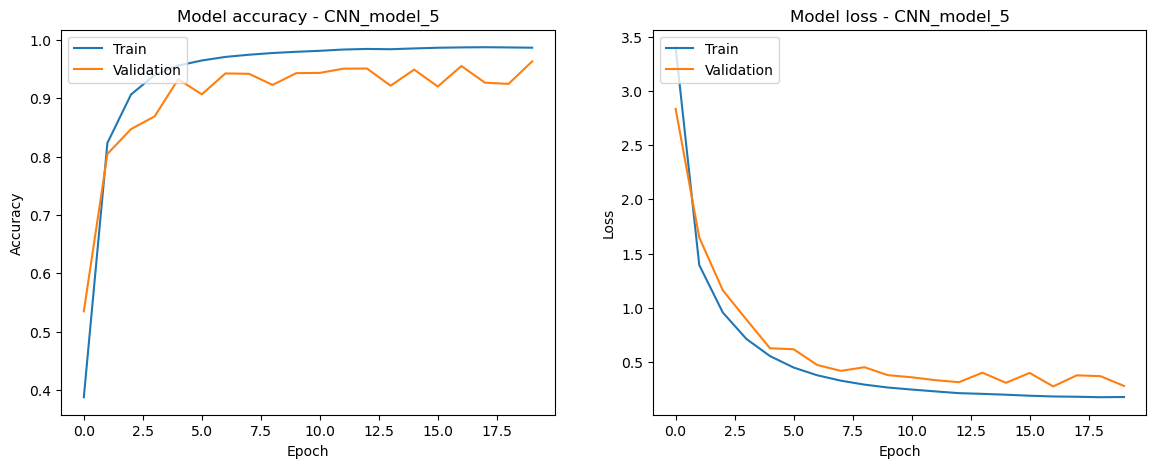

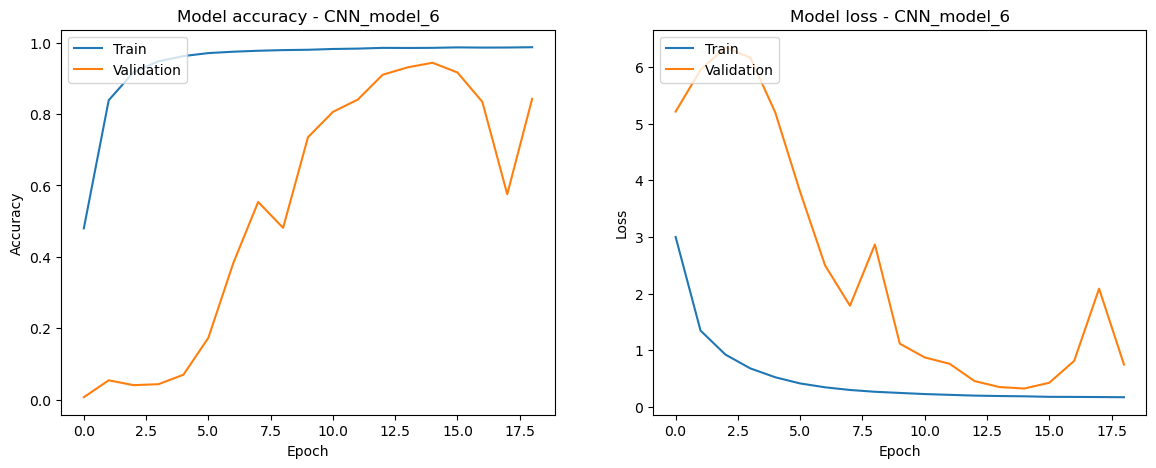

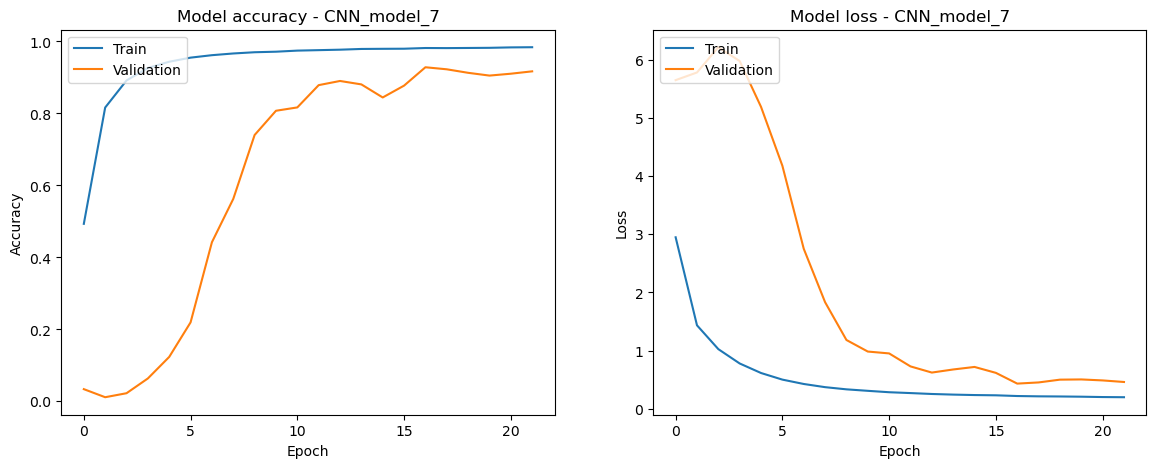

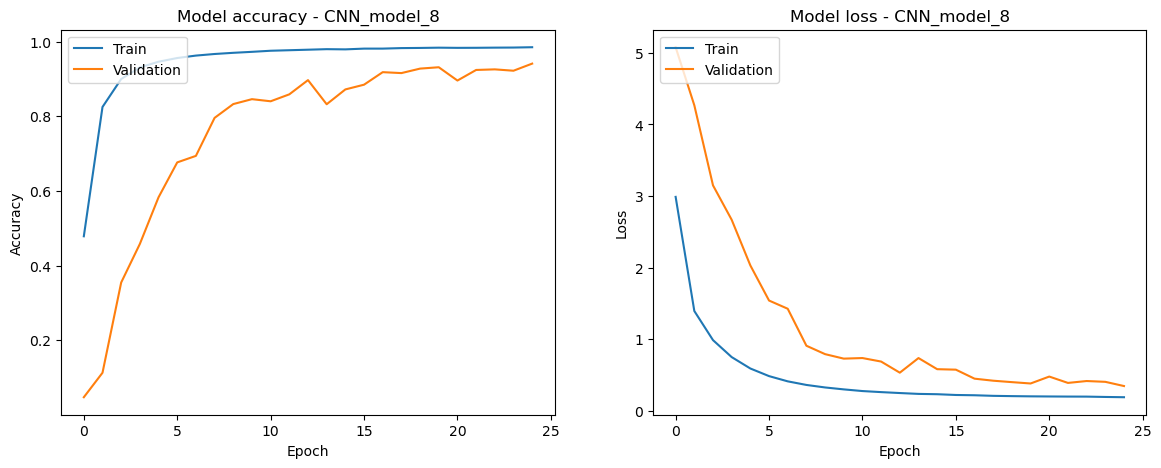

In [43]:
# Plot Training History
def plot_training_history(history, model_name):
    # Create directory if it does not exist
    directory = os.path.dirname(f'images/{model_name}_training_history.png')
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Plot training & validation accuracy values
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model accuracy - {model_name}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model loss - {model_name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.savefig(f'images/{model_name}_training_history.png')
    plt.show()

# Plot training history for each model
histories = [
    CNN_model_0_history, CNN_model_1_history, CNN_model_2_history,
    CNN_model_3_history, CNN_model_4_history, CNN_model_5_history,
    CNN_model_6_history, CNN_model_7_history, CNN_model_8_history
]

for i, history in enumerate(histories):
    plot_training_history(history, f'CNN_model_{i}')

Based on the above graphs from the model trainings, its clear that Model 4 was the best model to use, however we can test this using metrics such as F1, Recall and Precision as shown below

In [46]:
def load_models(model_paths):
    return [load_model(path) for path in model_paths]


# List of model paths
model_paths = [
    'models/CNN_model_0.keras', 'models/CNN_model_1.keras', 'models/CNN_model_2.keras',
    'models/CNN_model_3.keras', 'models/CNN_model_4.keras', 'models/CNN_model_5.keras',
    'models/CNN_model_6.keras', 'models/CNN_model_7.keras', 'models/CNN_model_8.keras'
]

# Load the models
models = load_models(model_paths)

validation_sets = [
    (x_val0, y_val0), (x_val1, y_val1), (x_val2, y_val2),
    (x_val3, y_val3), (x_val4, y_val4), (x_val5, y_val5),
    (x_val6, y_val6), (x_val7, y_val7), (x_val8, y_val8)
]

best_model_idx = -1
best_model_f1 = 0

for i, (model, (x_val, y_val)) in enumerate(zip(models, validation_sets)):
    y_val_pred = model.predict(x_val)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_classes = np.argmax(y_val, axis=1)

    precision = precision_score(
        y_val_classes, y_val_pred_classes, average='weighted')
    recall = recall_score(
        y_val_classes, y_val_pred_classes, average='weighted')
    f1 = f1_score(y_val_classes, y_val_pred_classes, average='weighted')

    print(
        f'Model_{i} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}')

    if f1 > best_model_f1:
        best_model_f1 = f1
        best_model_idx = i

print(f'\nBest Model: Model {best_model_idx} with F1-Score: {best_model_f1:.4f}')

138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Model_0 - Precision: 0.9266, Recall: 0.9145, F1-Score: 0.9121
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Model_1 - Precision: 0.9404, Recall: 0.9320, F1-Score: 0.9307
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Model_2 - Precision: 0.9251, Recall: 0.9141, F1-Score: 0.9135
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Model_3 - Precision: 0.8779, Recall: 0.8460, F1-Score: 0.8408
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
Model_4 - Precision: 0.9730, Recall: 0.9703, F1-Score: 0.9698
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Model_5 - Precision: 0.9652, Recall: 0.9553, F1-Score: 0.9566
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Model_6 - Precision: 0.9490, Recall: 0.9435, F1-Score: 0.9398


c:\Users\adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Model_7 - Precision: 0.9456, Recall: 0.9283, F1-Score: 0.9303
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Model_8 - Precision: 0.9571, Recall: 0.9413, F1-Score: 0.9405
Best Model: Model_4 with F1-Score: 0.9698


395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
Test Accuracy: 0.9467
Test Precision: 0.9563
Test Recall: 0.9467
Test F1-Score: 0.9491


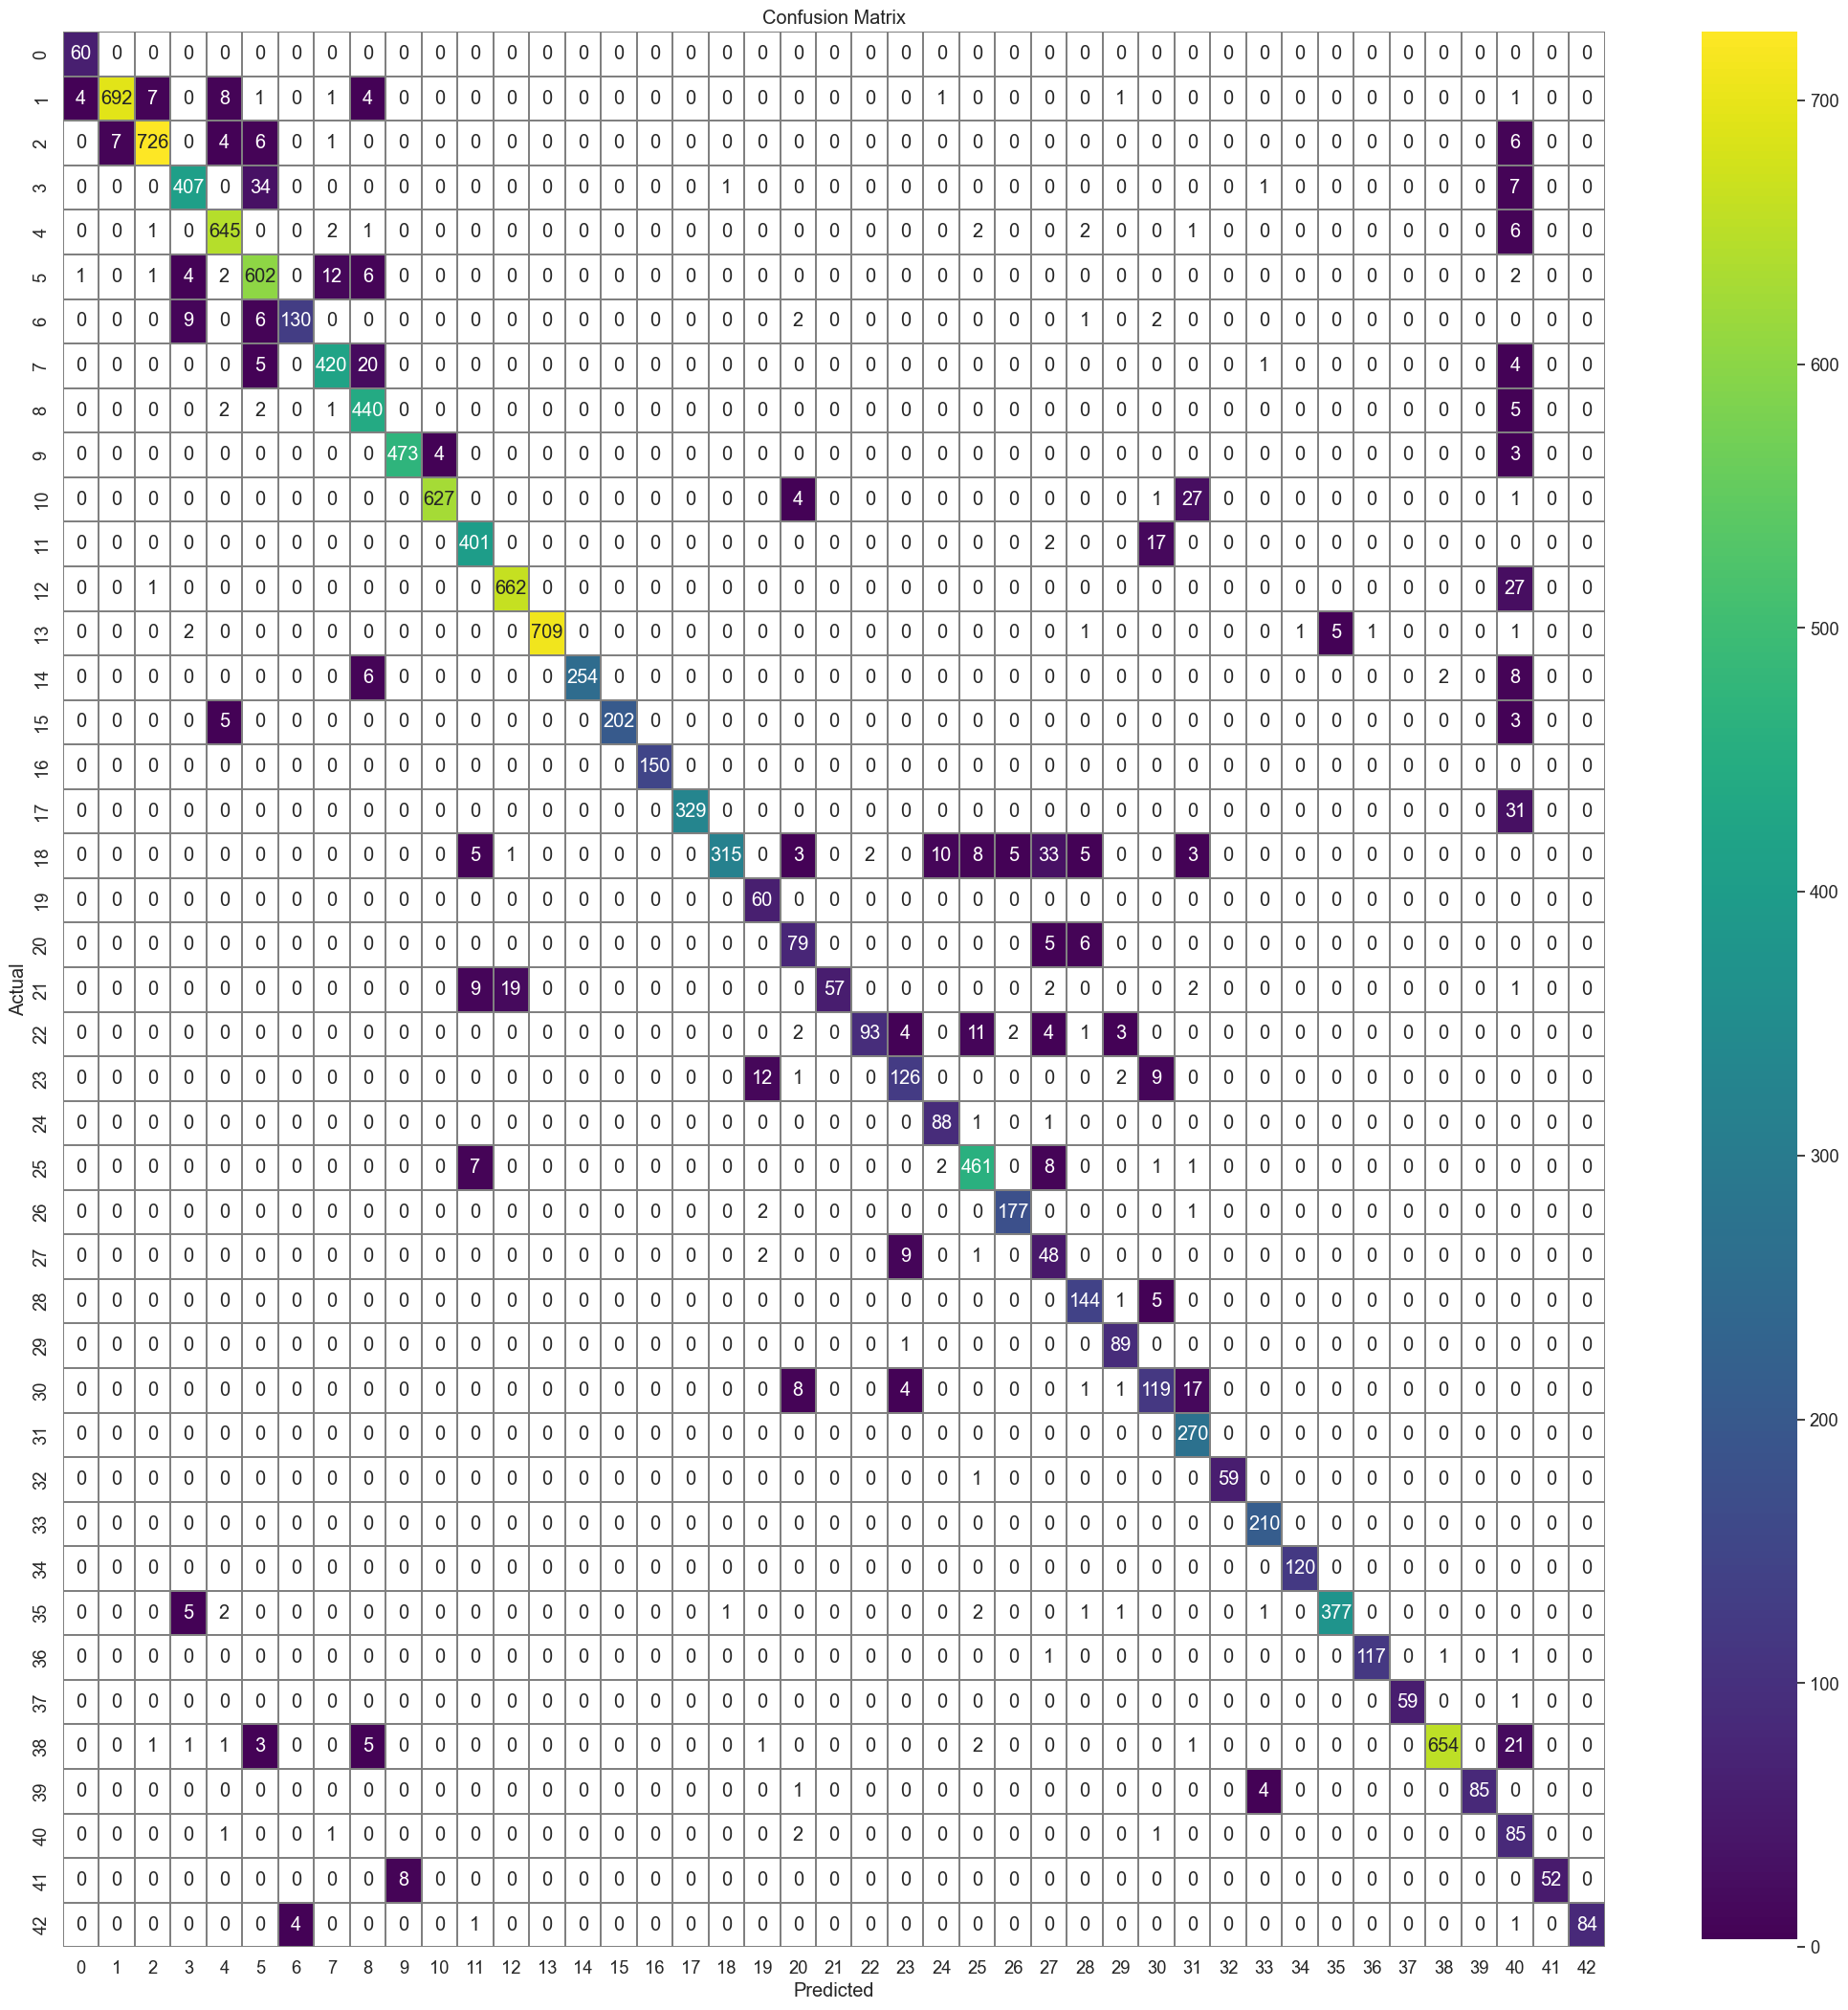

Test ROC AUC: 0.9995


<Figure size 640x480 with 0 Axes>

In [76]:
# Define the function to convert RGB images to grayscale
def rgb_to_grayscale(images):
    return np.dot(images[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.float32)[..., np.newaxis]


# Load the best model
best_model_path = model_paths[best_model_idx]
best_model = load_model(best_model_path)

# List of test sets
test_sets = [
    (x_test0, y_test0), (x_test1, y_test1), (x_test2, y_test2),
    (x_test3, y_test3), (x_test4, y_test4), (x_test5, y_test5),
    (x_test6, y_test6), (x_test7, y_test7), (x_test8, y_test8)
]

# Get the test set for the best model
x_test, y_test = test_sets[best_model_idx]

# Predict on the test set
y_test_pred = best_model.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Check if y_test is one-hot encoded or in label format
if len(y_test.shape) == 2:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Calculate metrics
accuracy = accuracy_score(y_test_classes, y_test_pred_classes)
precision = precision_score(
    y_test_classes, y_test_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_test_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_test_pred_classes, average='weighted')

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1-Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_test_pred_classes)

# Customize the color map to have white for zero
cmap = 'viridis'  # Change this to your desired colormap
cmap_base = plt.get_cmap(cmap)
colors = cmap_base(np.arange(cmap_base.N))
colors[0, :] = np.array([1, 1, 1, 1])  # RGBA for white
customized_cmap = mcolors.ListedColormap(colors)

# Plot the confusion matrix using the specified color map
ax = plt.subplots(figsize=(26, 26))
sns.heatmap(cm, annot=True, linewidths=0.01,
            cmap=customized_cmap, linecolor="gray", fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Create directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

# Save the confusion matrix plot
plt.savefig(os.path.join('images', 'confusion_matrix.png'))

# ROC AUC Score
# Adjust according to the actual number of classes
num_classes = len(np.unique(y_test_classes))
y_test_bin = tf.keras.utils.to_categorical(y_test_classes, num_classes)
roc_auc = roc_auc_score(y_test_bin, y_test_pred,
                        average='weighted', multi_class='ovr')
print(f'Test ROC AUC: {roc_auc:.4f}')

In [50]:
print(f'Best Model: Model_{best_model_idx} with F1-Score: {best_model_f1:.4f}')

Best Model: Model_4 with F1-Score: 0.9698


##### Additional Analysis using the best model on each test set

In [58]:
def rgb_to_grayscale(images):
    # Convert RGB images to grayscale
    return np.dot(images[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.float32)[..., np.newaxis]


def evaluate_CNN_model(model_name, x_test, y_test, cmap='viridis'):
    # Load the best model
    model = load_model(f"models/{model_name}.keras")

    # Check if the model expects grayscale images
    input_shape = model.input_shape
    if input_shape[-1] == 1 and x_test.shape[-1] == 3:
        x_test = rgb_to_grayscale(x_test)

    # Check if y_test is already one-hot encoded
    if len(y_test.shape) == 1:  # If y_test is a single array of labels
        # Number of classes from the model
        num_classes = model.output_shape[-1]
        y_test = tf.keras.utils.to_categorical(y_test, num_classes)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f'Test loss: {test_loss:.4f}')
    print(f'Test accuracy: {test_accuracy:.4f}')

    # Calculate predicted probabilities for each class
    y_pred_probs = model.predict(x_test, verbose=0)
    # Convert probabilities to class labels by selecting the class with the highest probability
    y_pred = np.argmax(y_pred_probs, axis=1)

    y_test_np = y_test.numpy() if isinstance(y_test, tf.Tensor) else y_test

    # Calculate confusion matrix for test set
    cm = confusion_matrix(np.argmax(y_test_np, axis=1), y_pred)

    # Predict the values from the test dataset
    Y_pred = model.predict(x_test, verbose=0)
    # Convert predictions to class labels
    Y_pred_classes = np.argmax(Y_pred, axis=1)

    # Convert y_test to class labels if necessary
    if y_test.shape[1] > 1:  # This assumes y_test is an array and has a second dimension
        Y_true = np.argmax(y_test, axis=1)
    else:
        Y_true = y_test  # Assume y_test is already in the correct format

    # Compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

    # Customize the color map to have white for zero
    cmap_base = plt.get_cmap(cmap)
    colors = cmap_base(np.arange(cmap_base.N))
    colors[0, :] = np.array([1, 1, 1, 1])  # RGBA for white
    customized_cmap = mcolors.ListedColormap(colors)

    # Plot the confusion matrix using the specified color map
    f, ax = plt.subplots(figsize=(26, 26))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,
                cmap=customized_cmap, linecolor="gray", fmt='d', ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")

    # Create directory if it doesn't exist
    if not os.path.exists('images'):
        os.makedirs('images')

    # Save the confusion matrix plot
    plt.savefig(os.path.join('images', f'{model_name}_confusion_matrix.png'))
    plt.show()  # Show the plot
    plt.close()  # Close the plot to free up memory

    # Calculate precision, recall, and F1 score
    precision = precision_score(Y_true, Y_pred_classes, average='weighted')
    recall = recall_score(Y_true, Y_pred_classes, average='weighted')
    f1 = f1_score(Y_true, Y_pred_classes, average='weighted')

    # Calculate ROC curve and AUC
    roc_auc = None
    if len(np.unique(Y_true)) == 2:  # Binary classification
        fpr, tpr, thresholds = roc_curve(Y_true, y_pred_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2,
                 label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        # Save ROC curve plot
        plt.savefig(os.path.join('images', f'{model_name}_roc_curve.png'))
        plt.show()  # Show the plot
        plt.close()

    # Combine metrics into a dictionary
    metrics = {
        'Test Loss': test_loss,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    return metrics

Test loss: 0.3366
Test accuracy: 0.9467


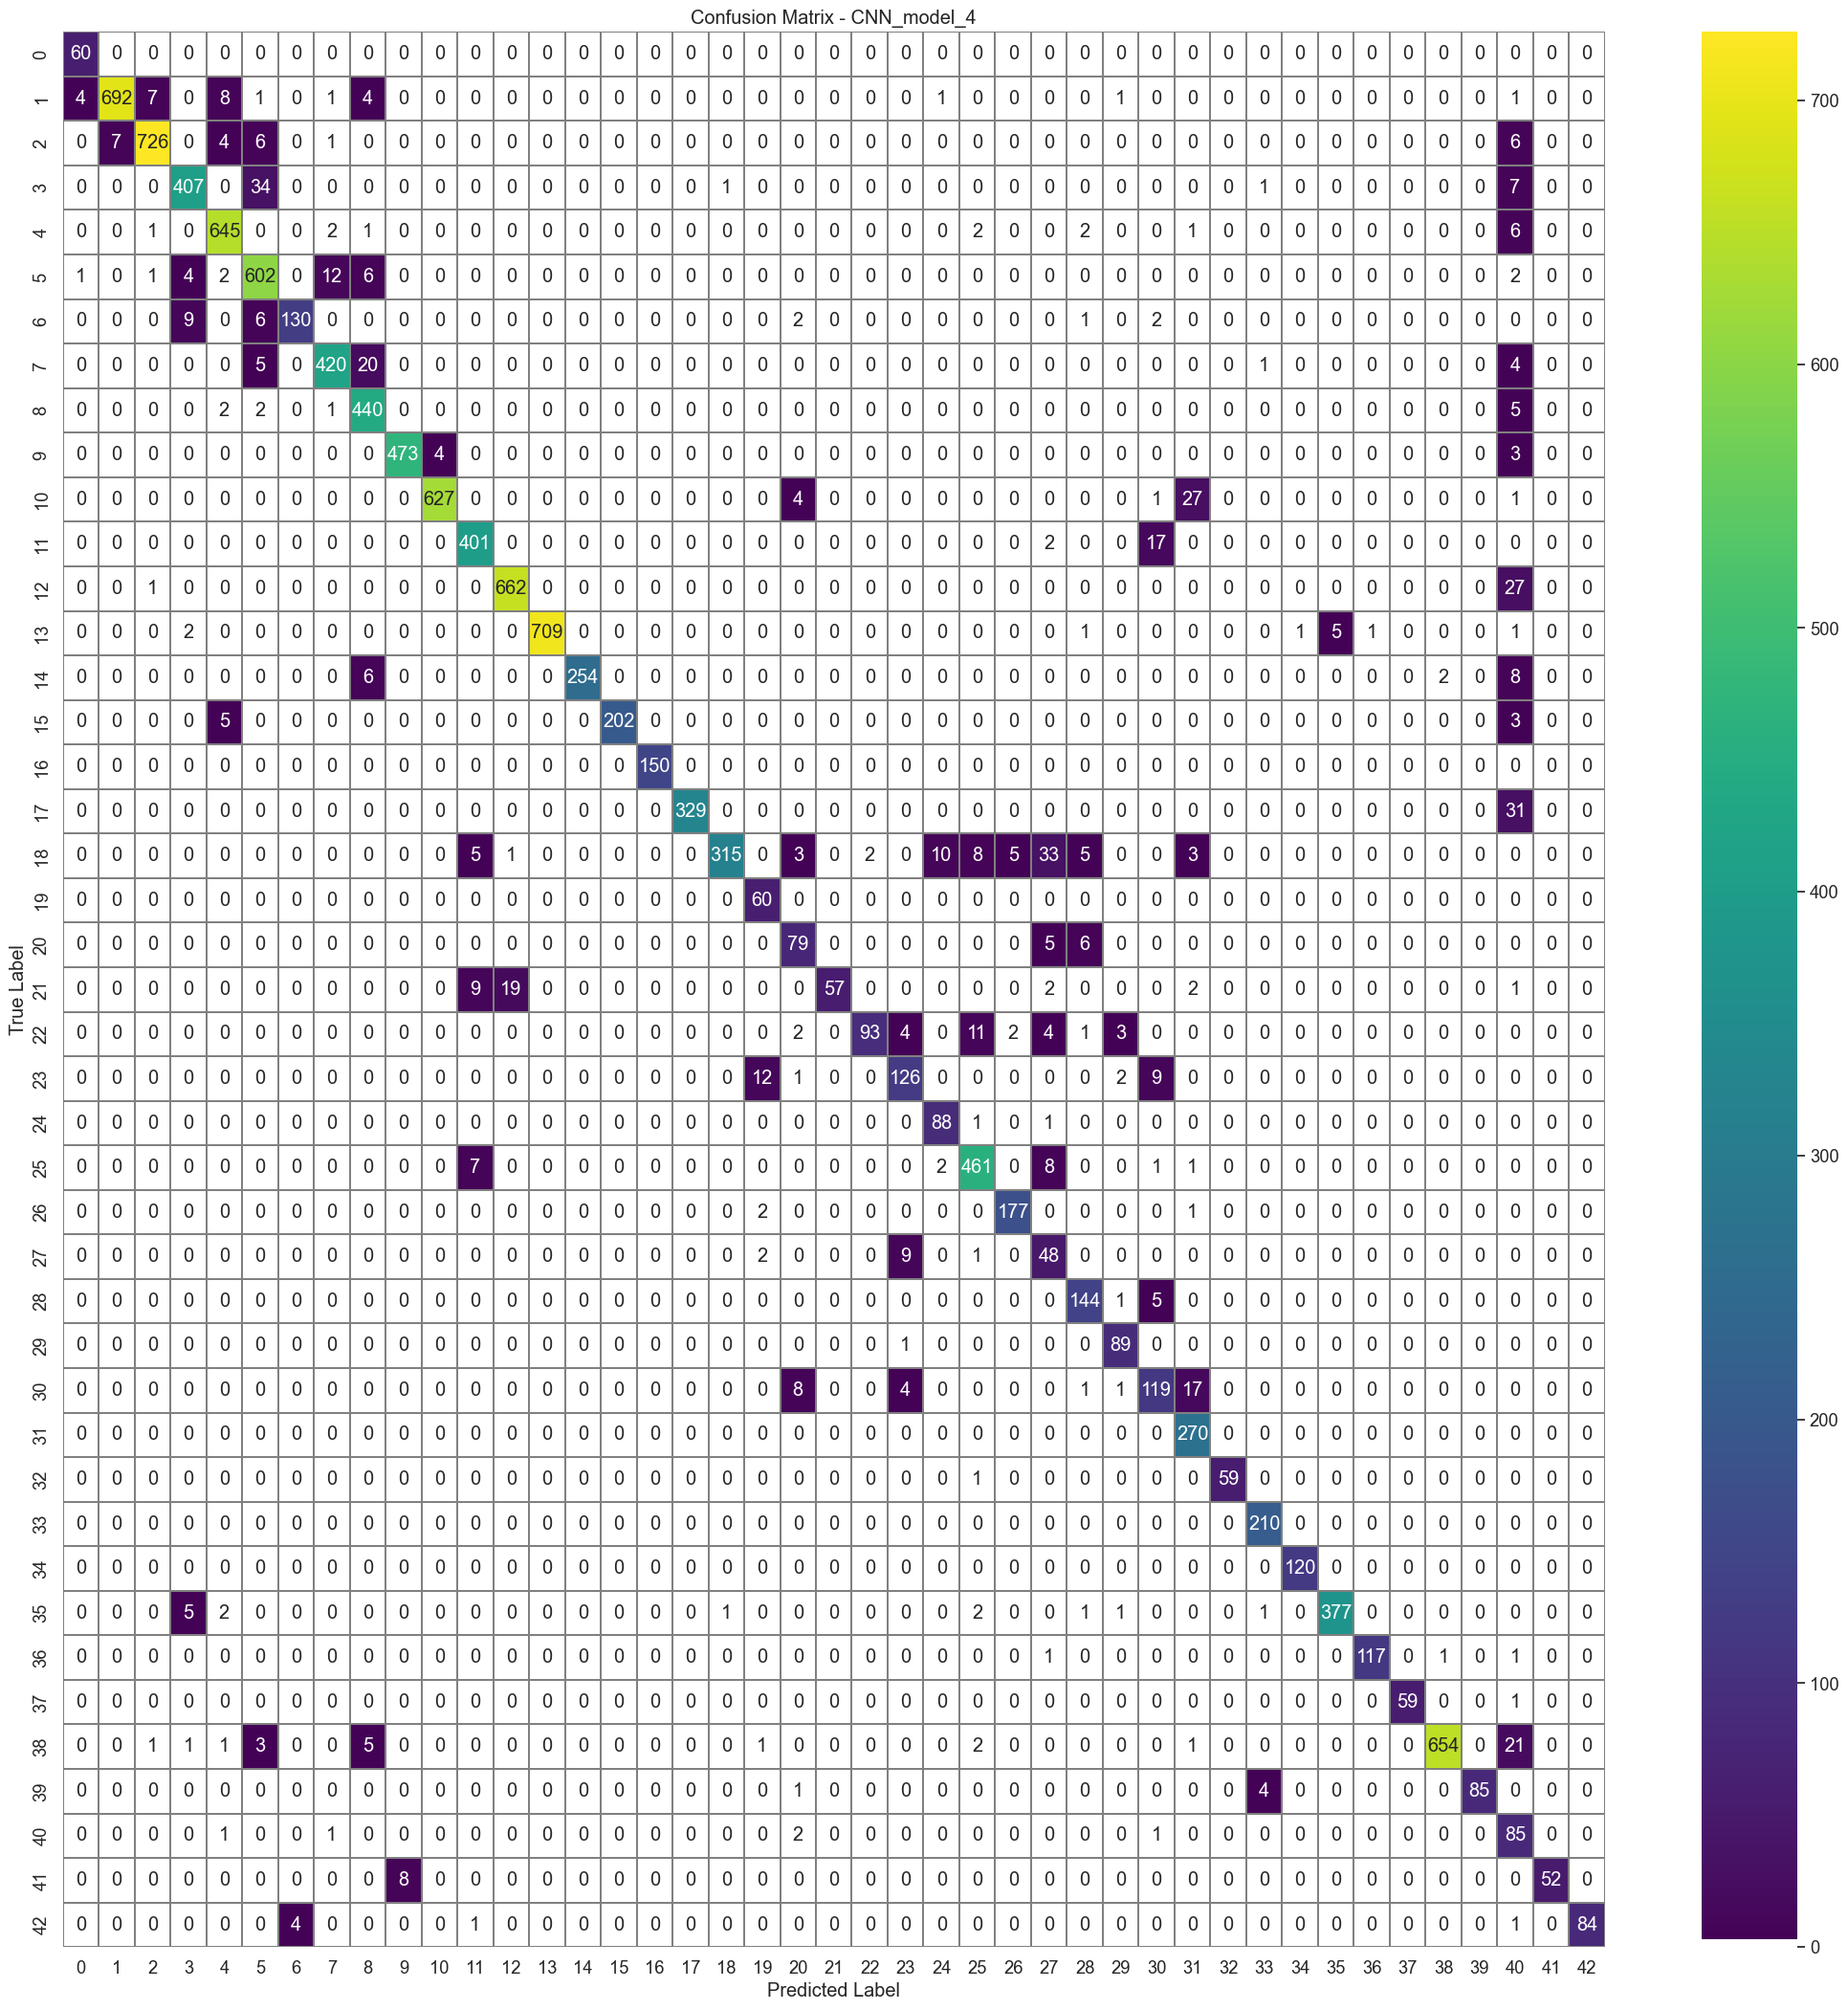

Test loss: 6.2798
Test accuracy: 0.0048


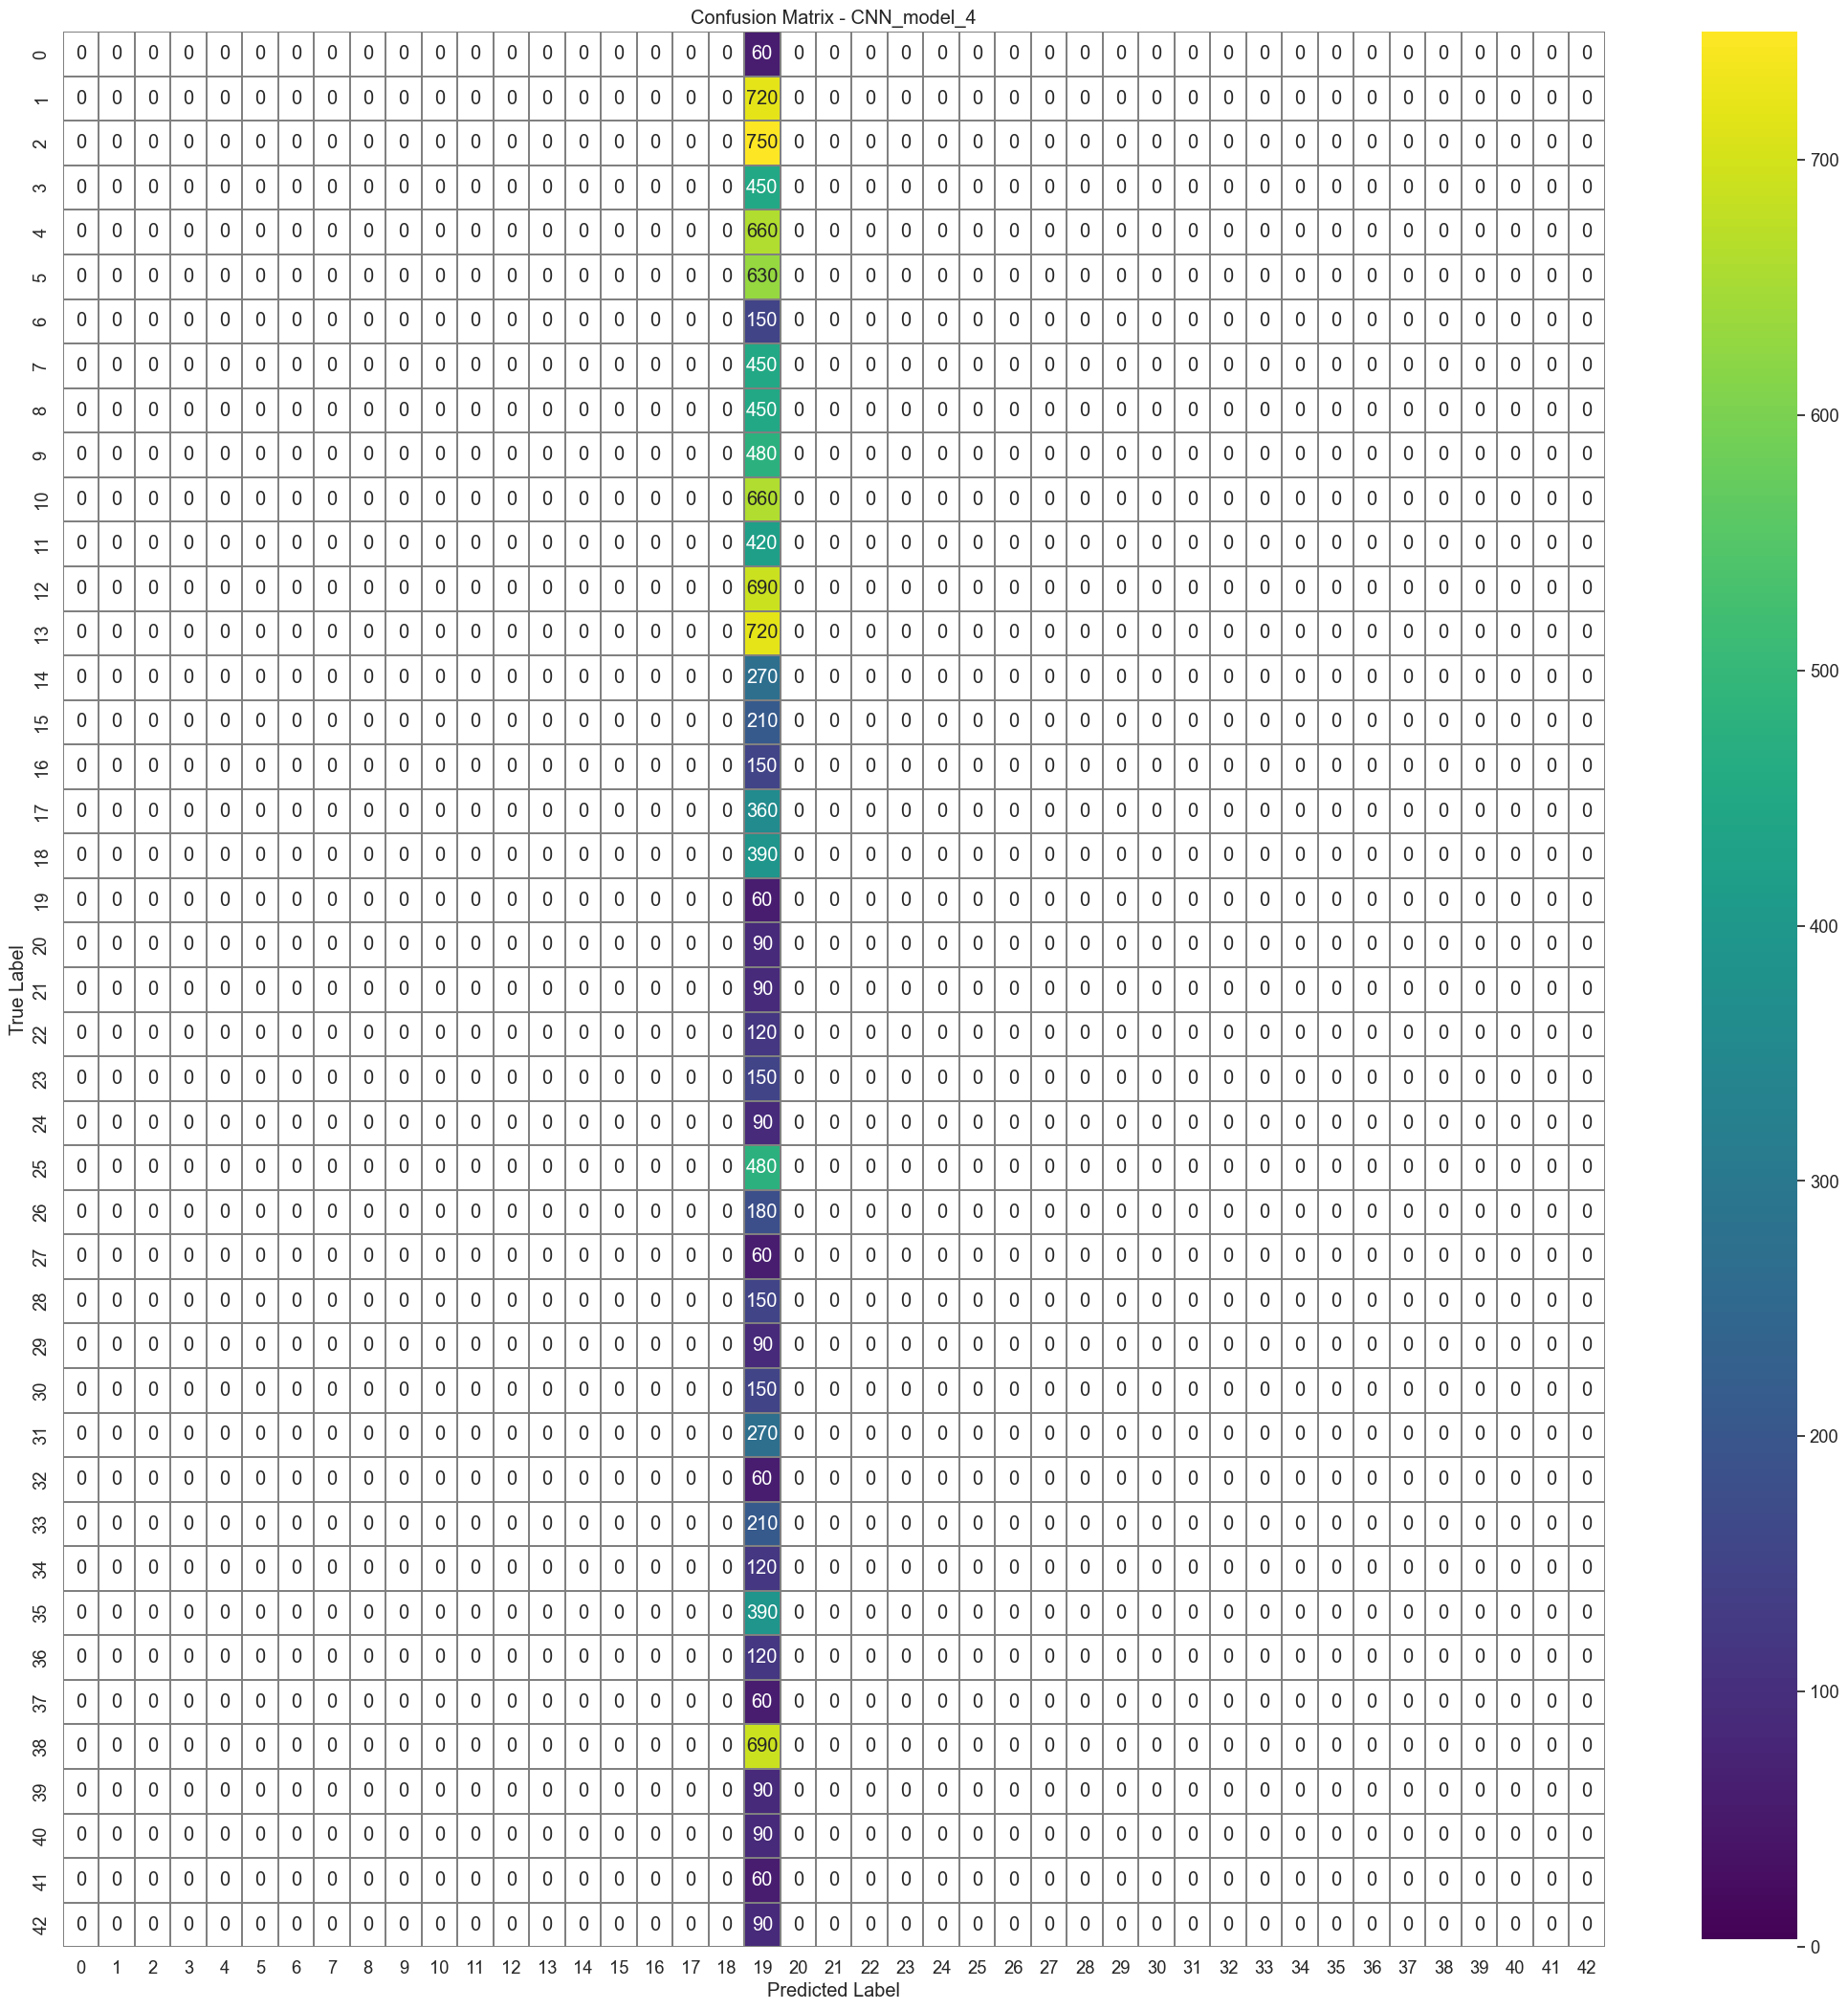

c:\Users\adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test loss: 7.2057
Test accuracy: 0.0048


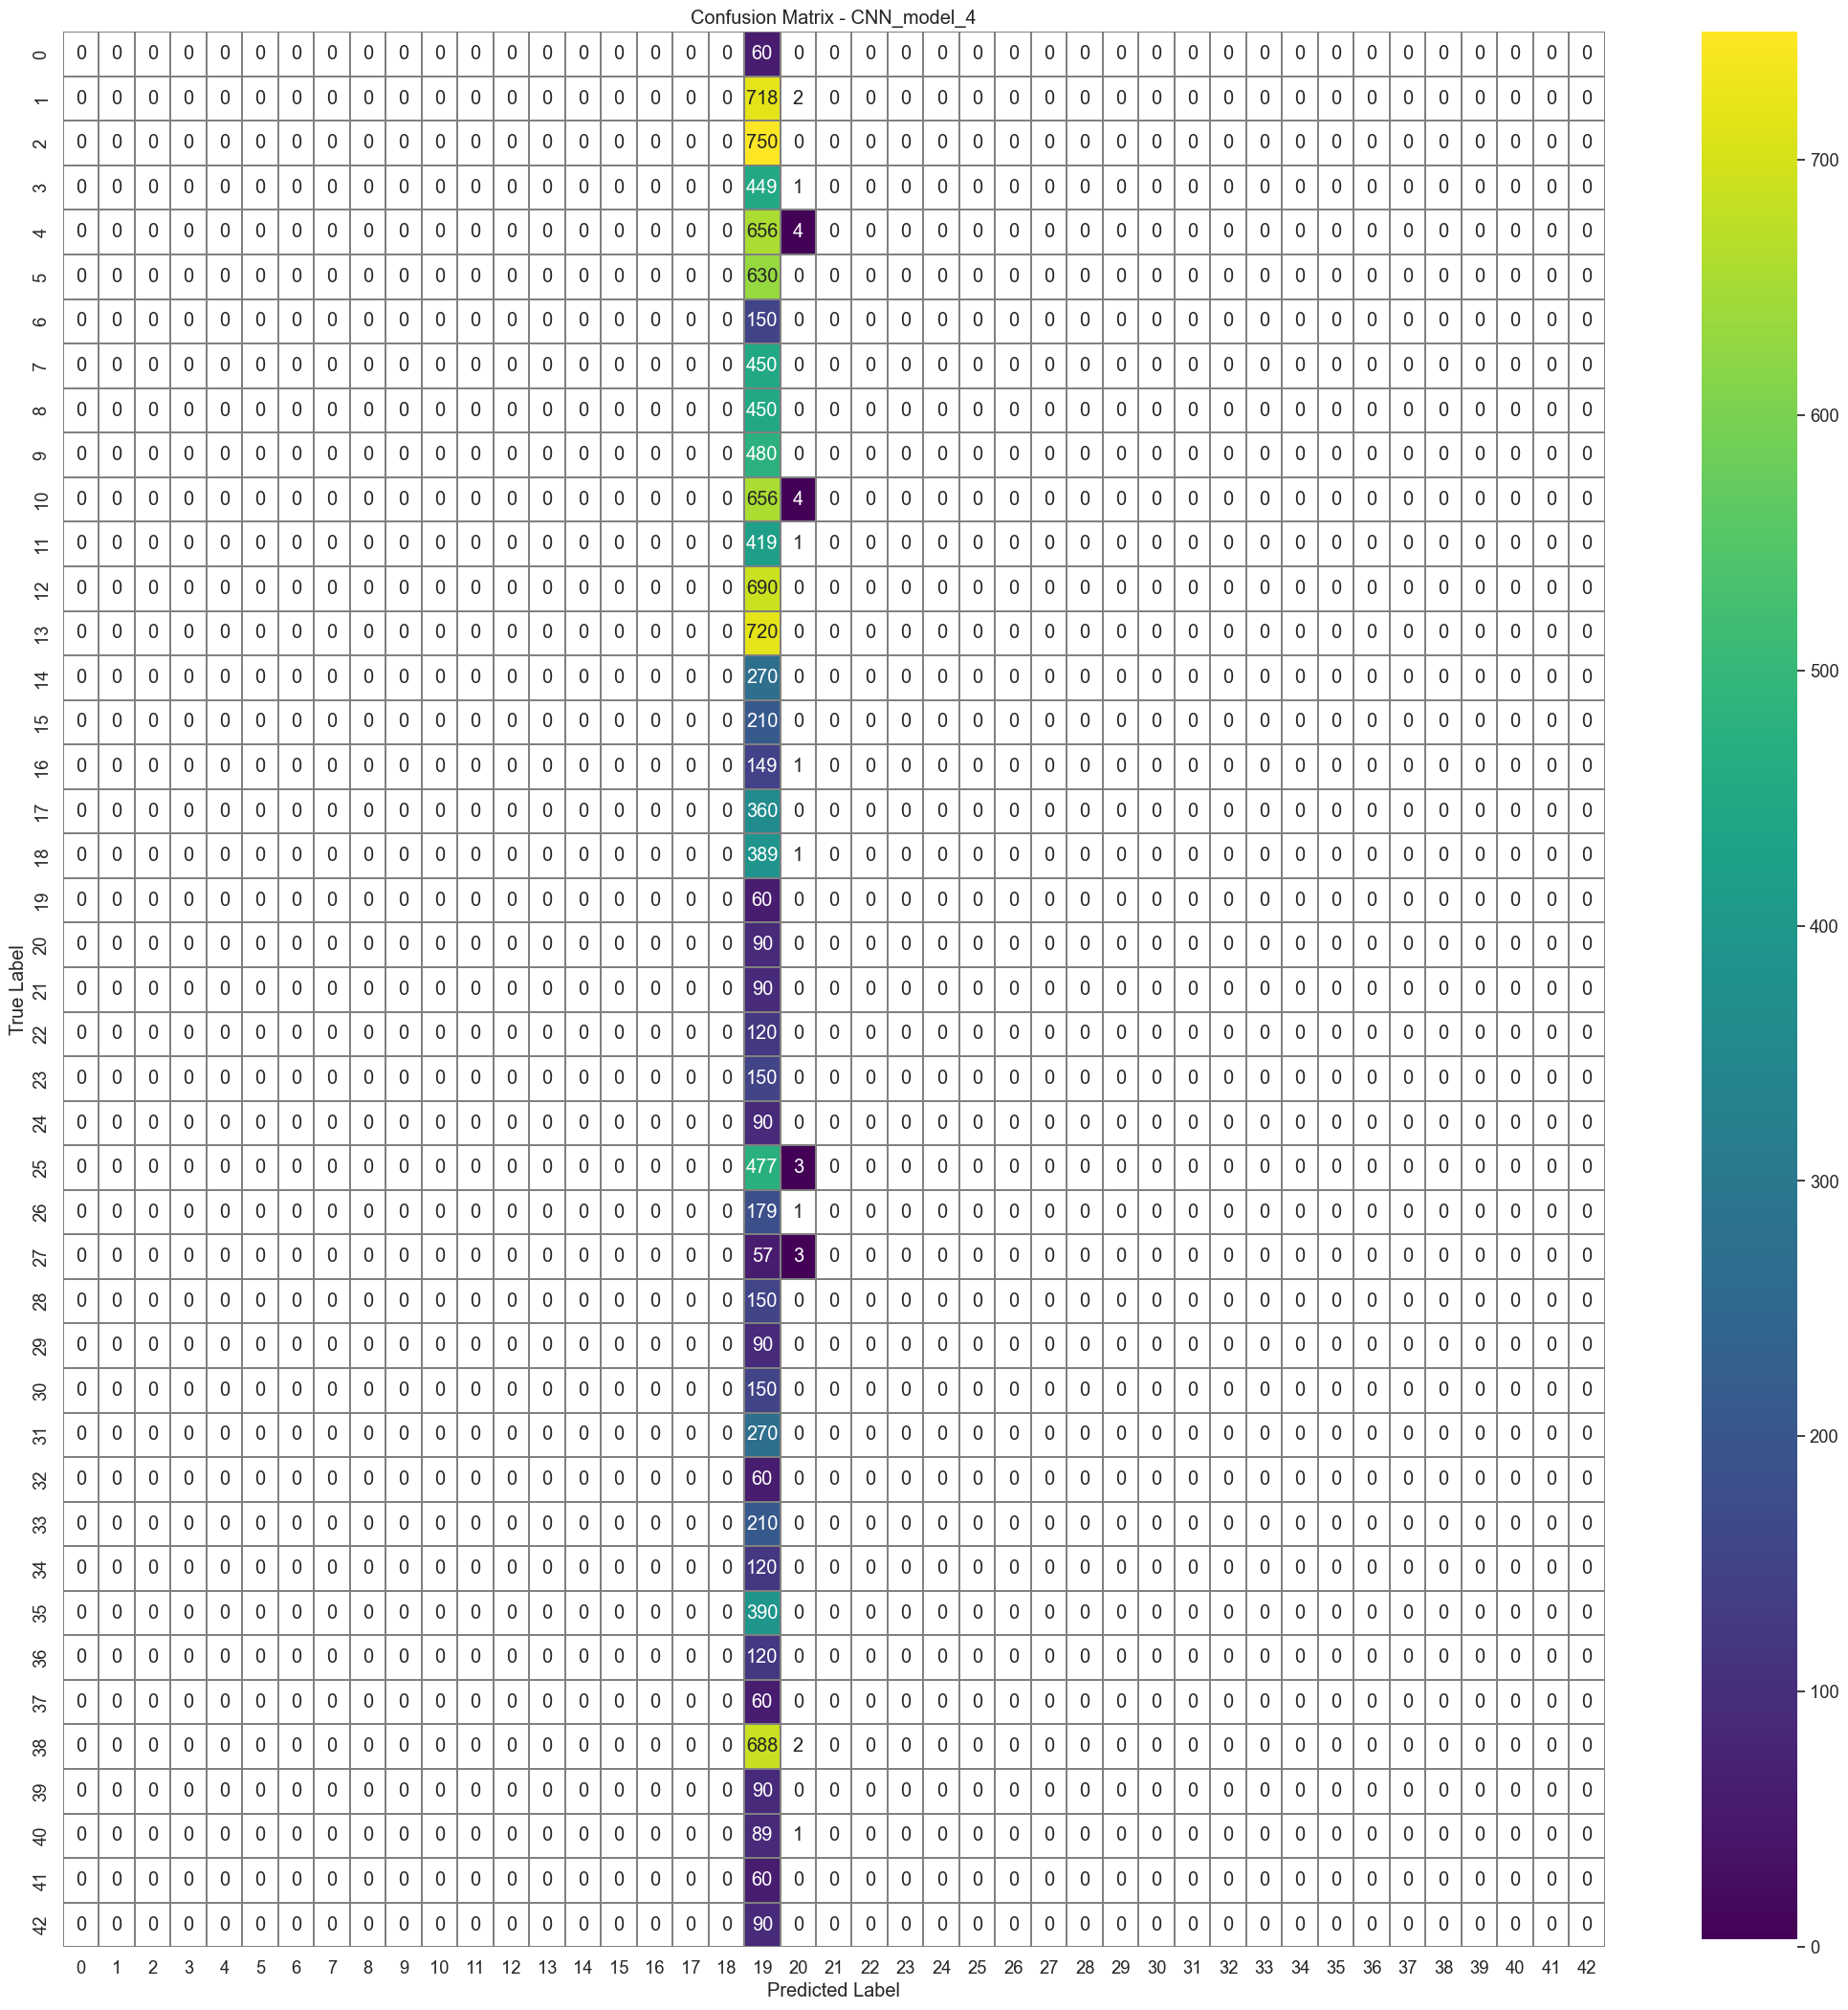

c:\Users\adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test loss: 6.4163
Test accuracy: 0.0270


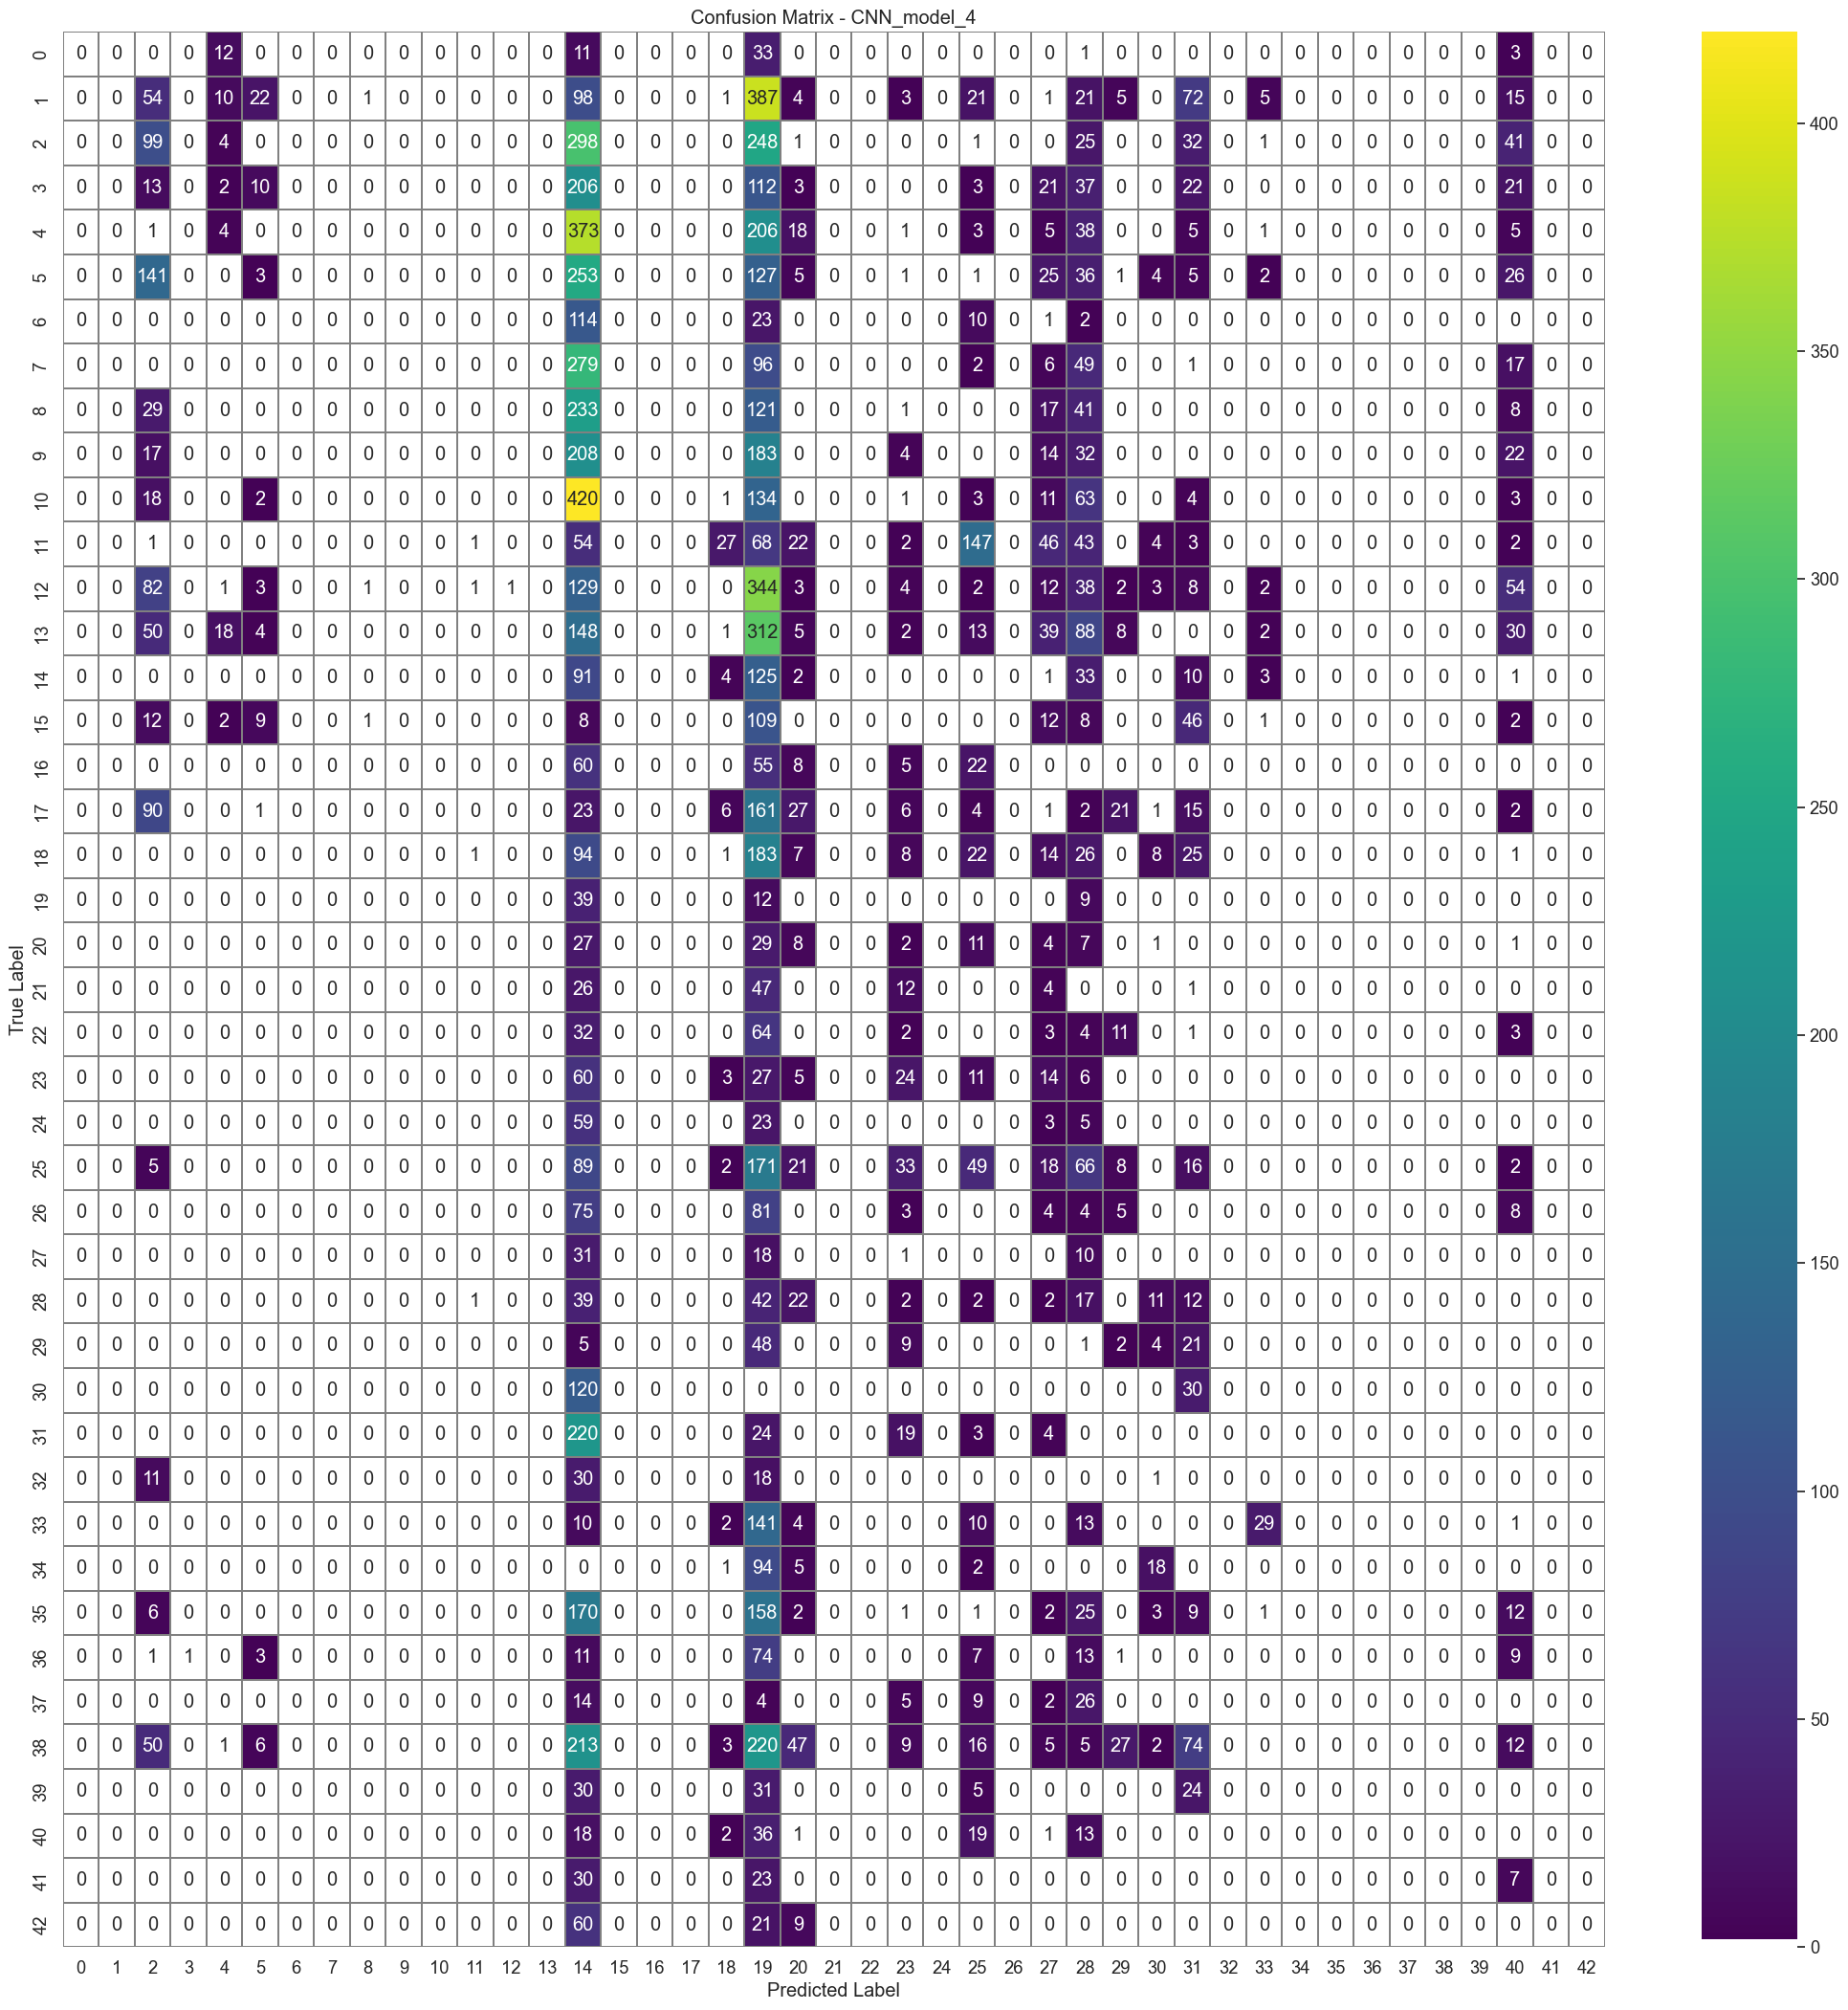

c:\Users\adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test loss: 0.3366
Test accuracy: 0.9467


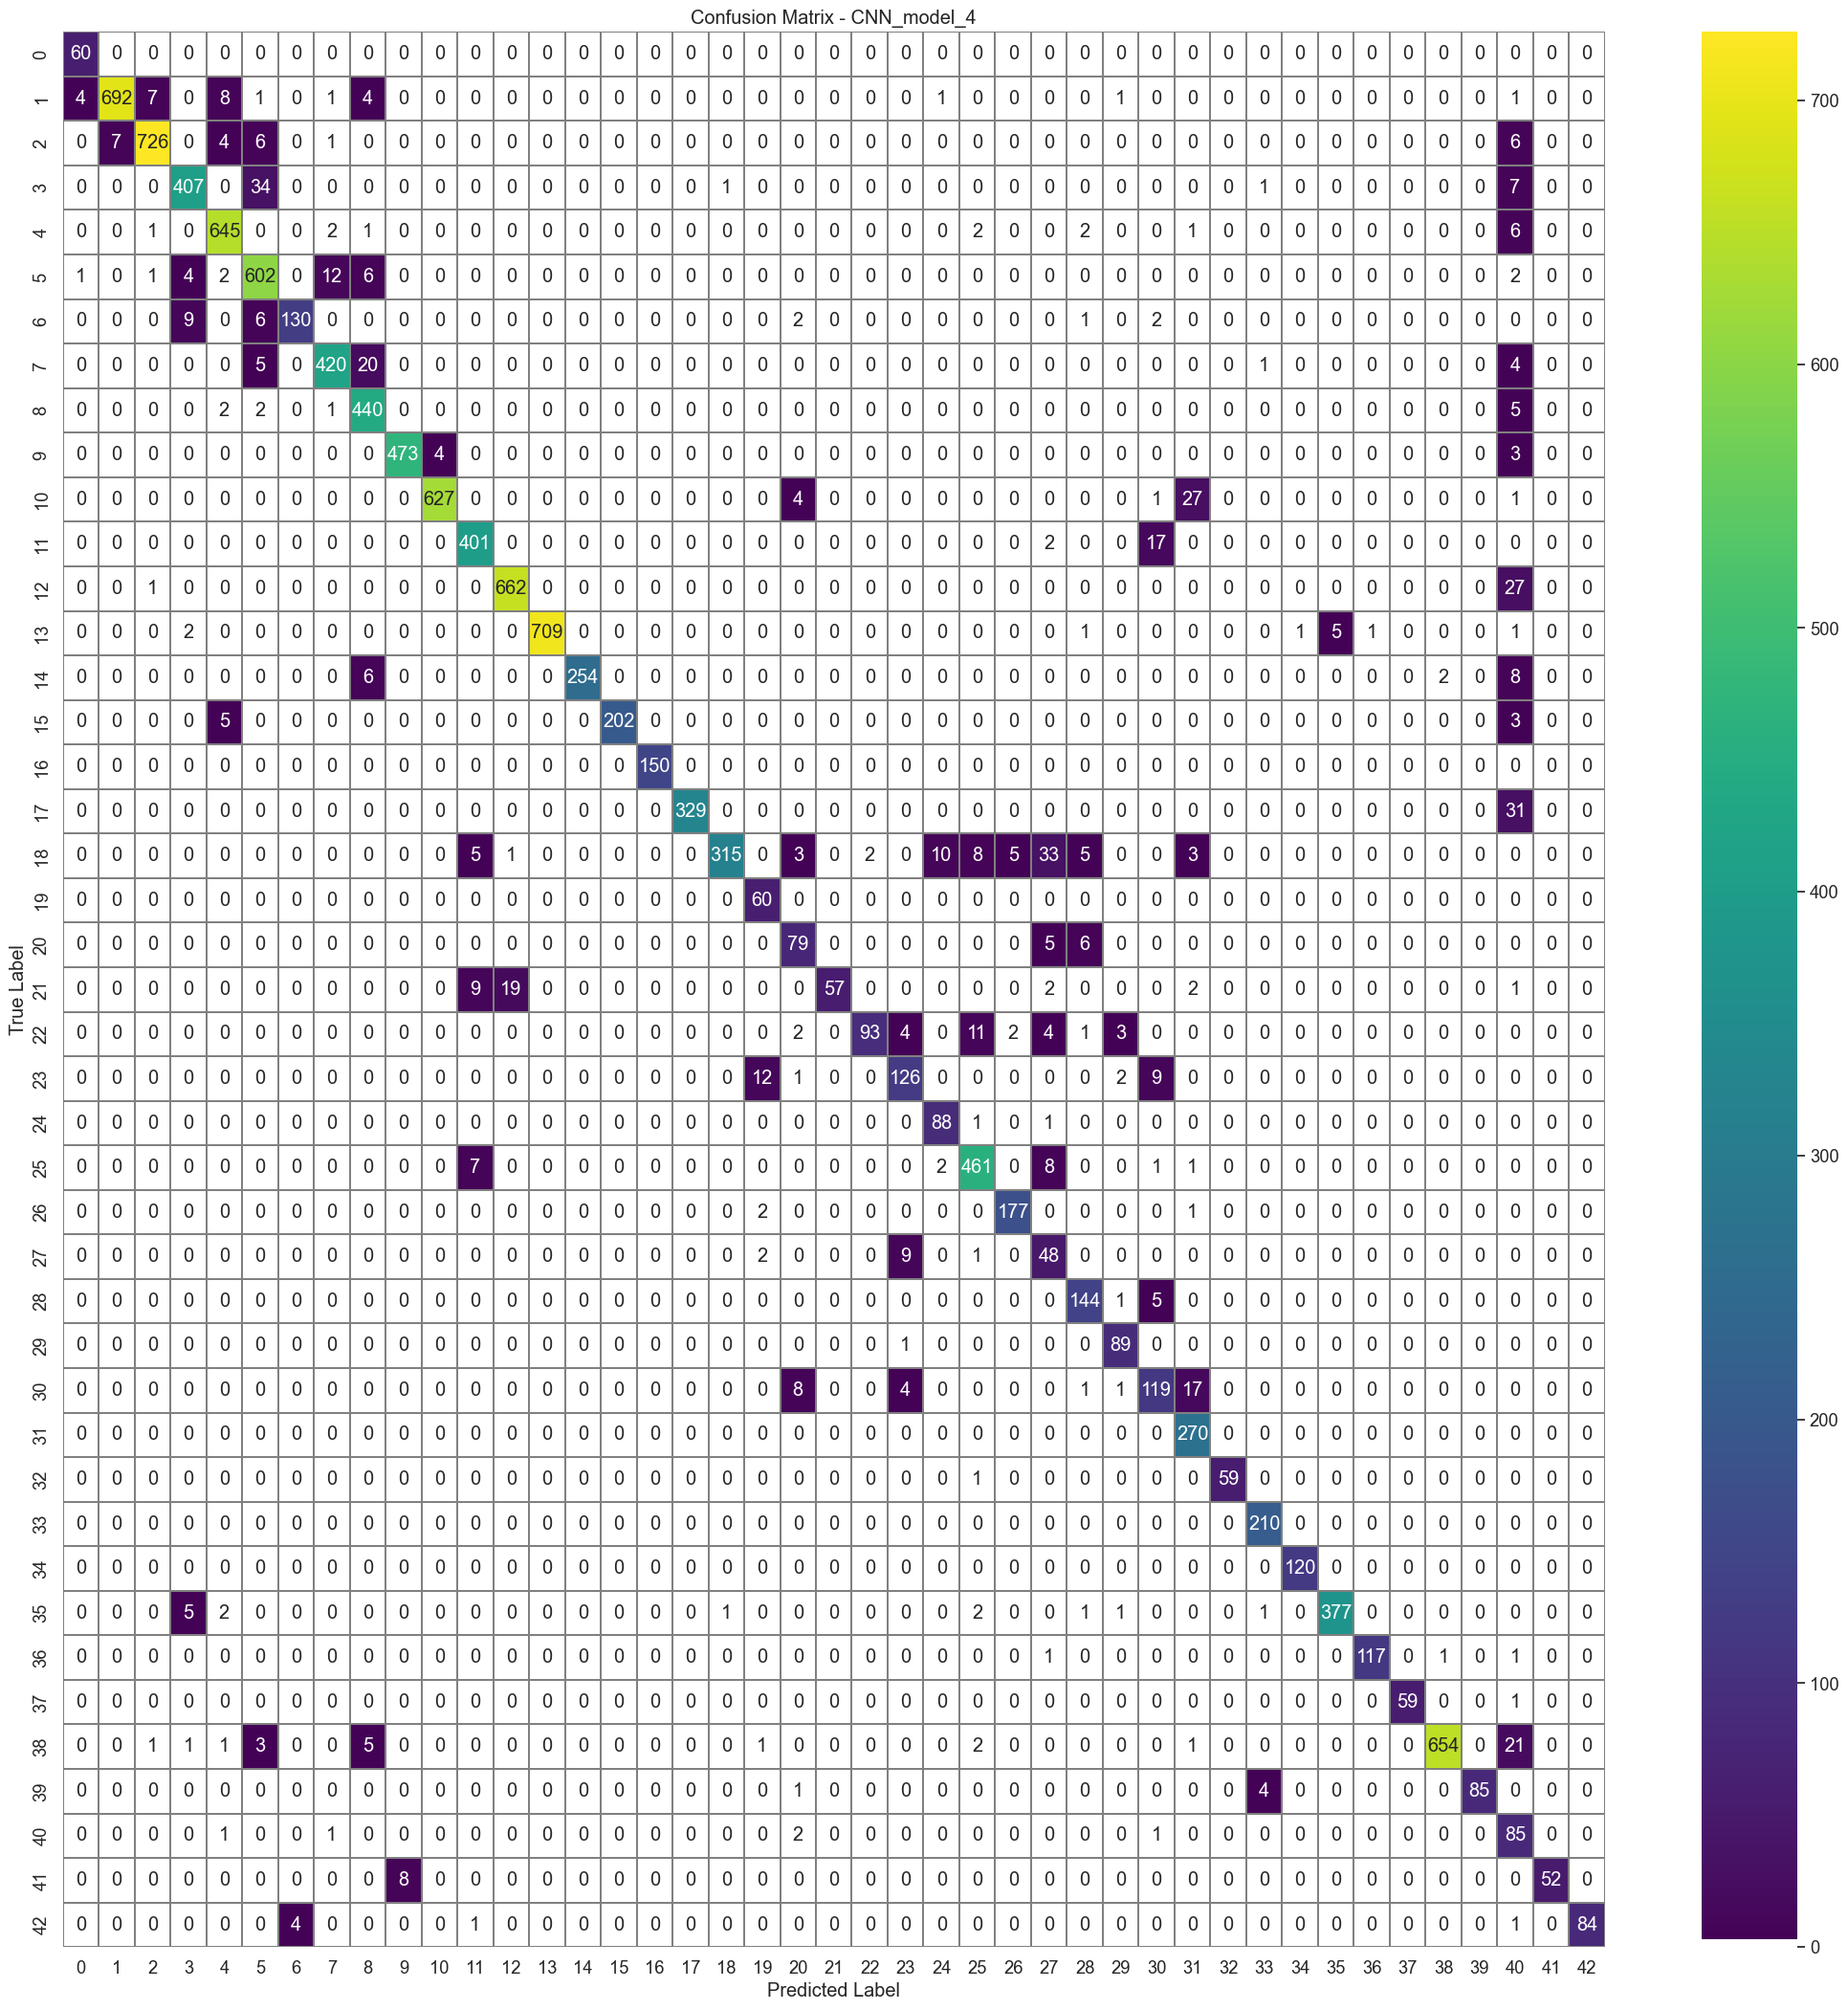

Test loss: 0.4006
Test accuracy: 0.9273


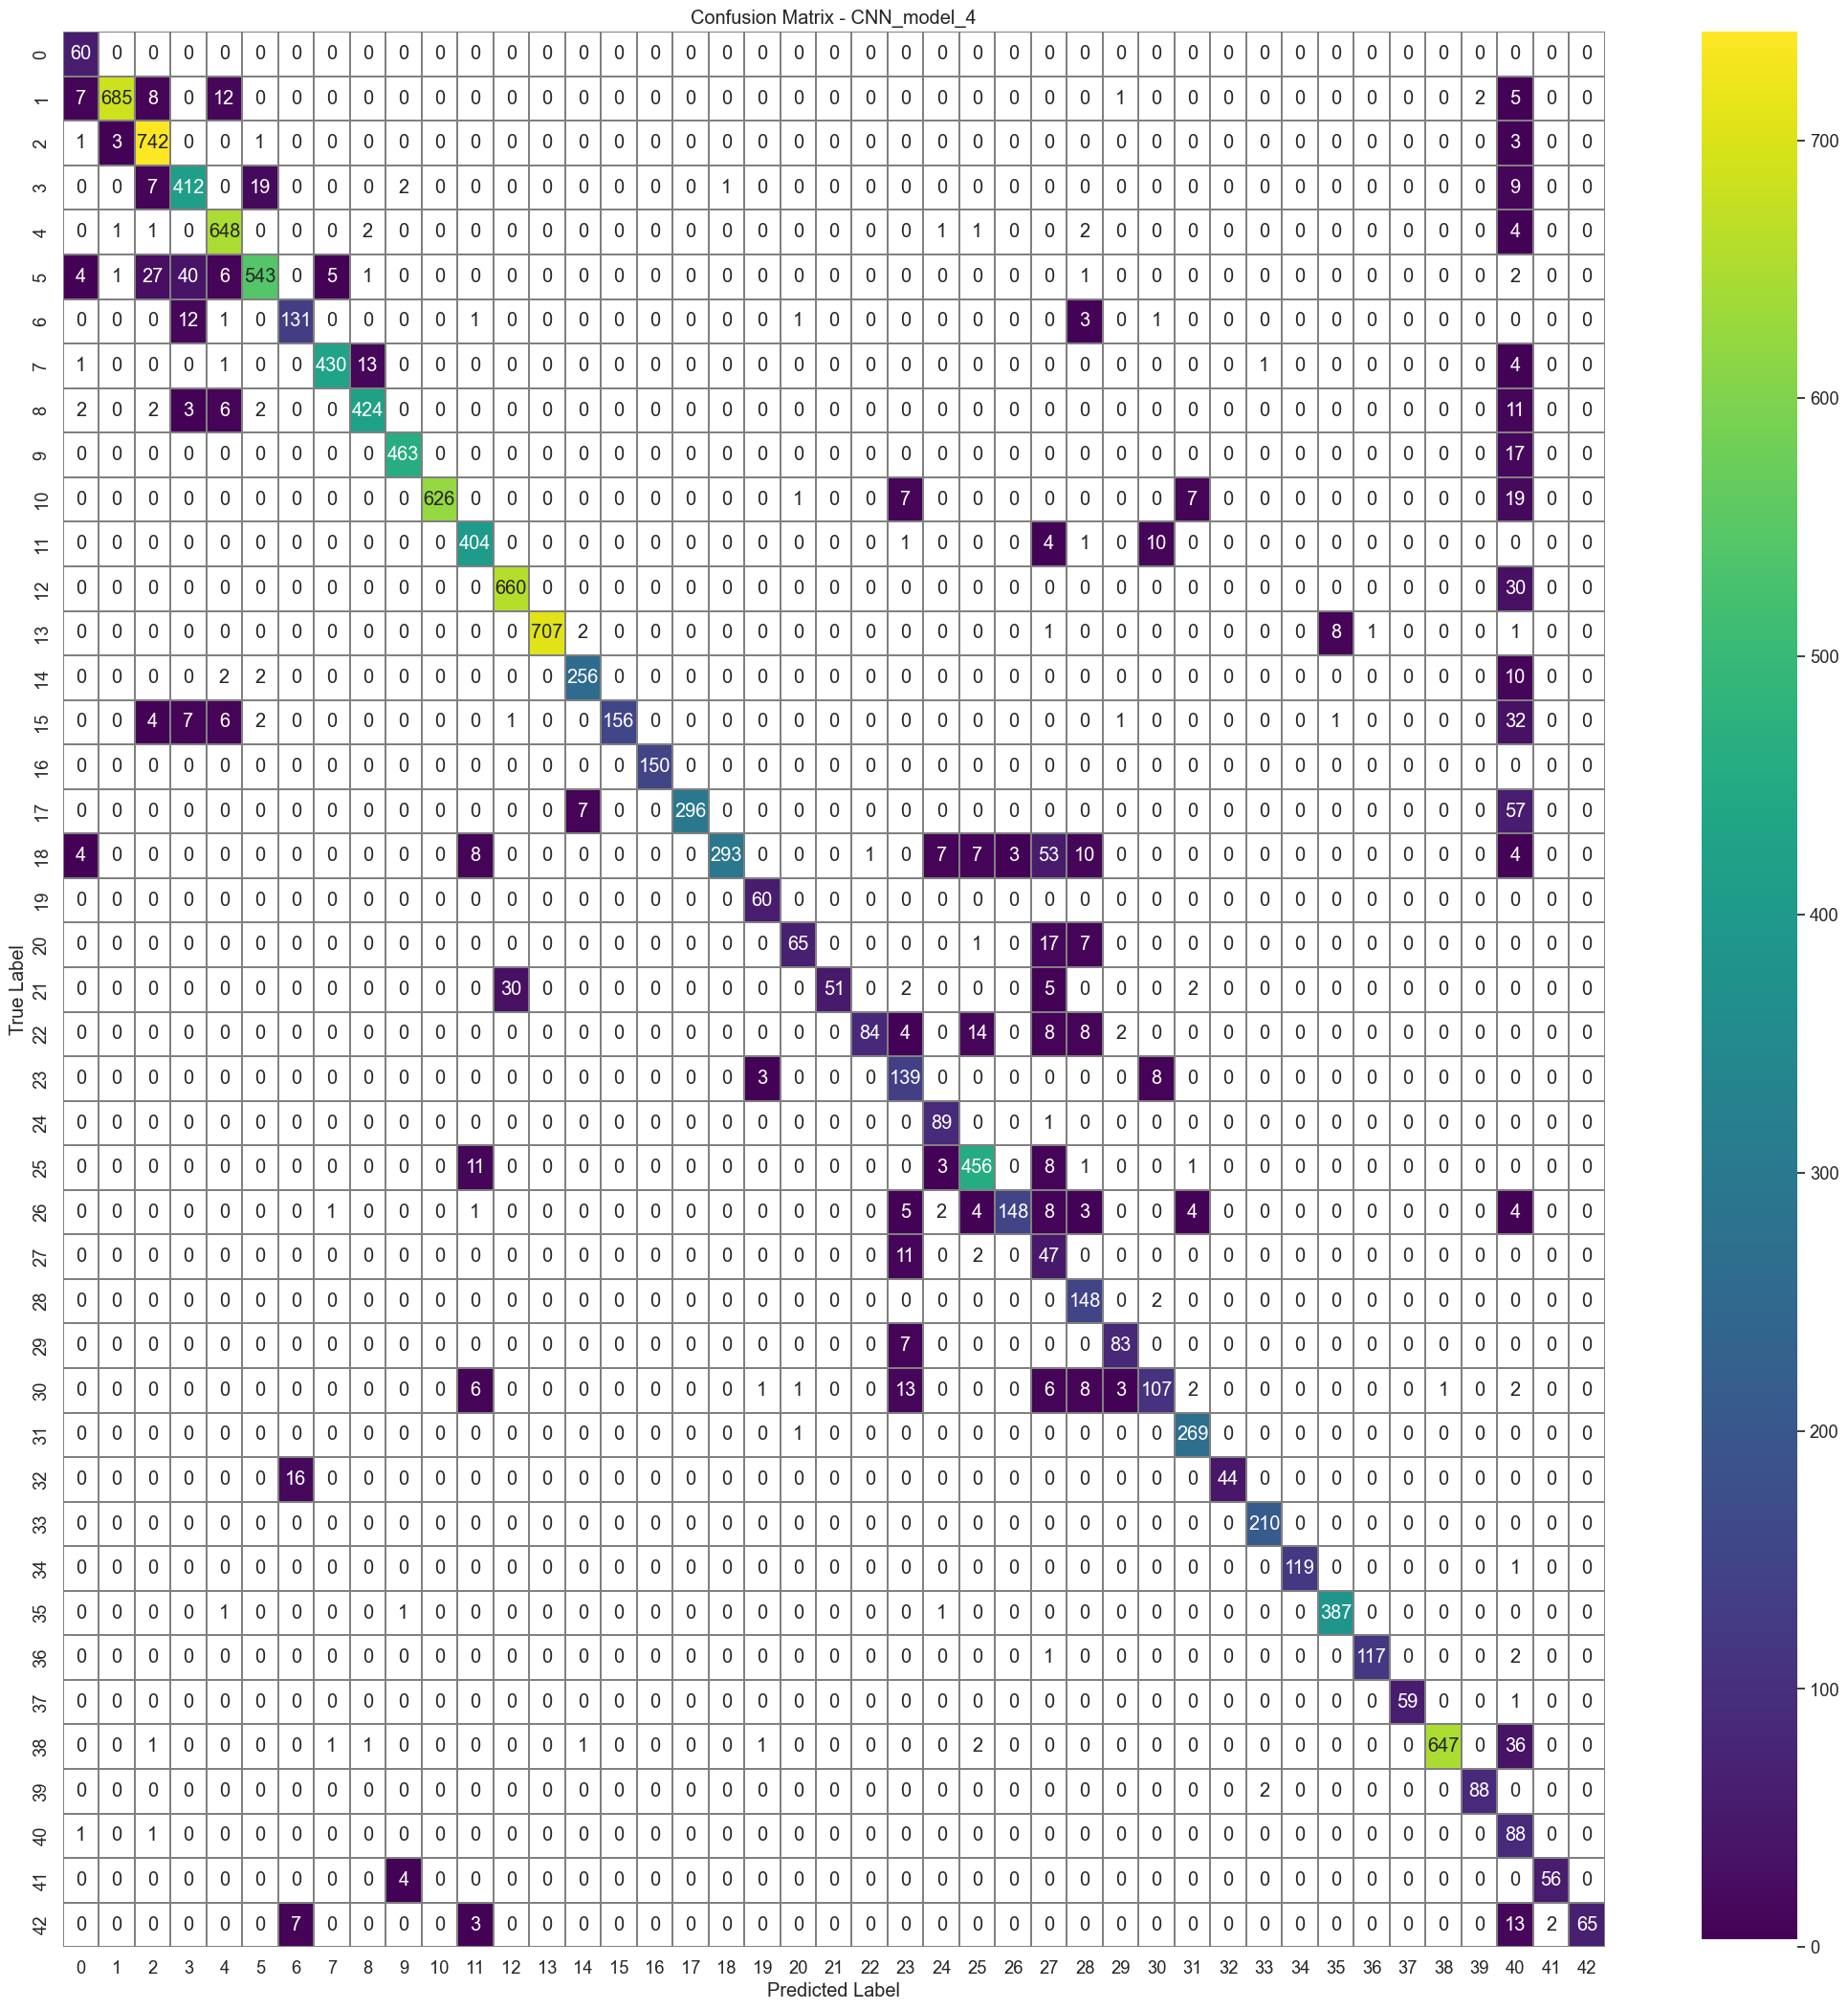

Test loss: 6.0706
Test accuracy: 0.0048


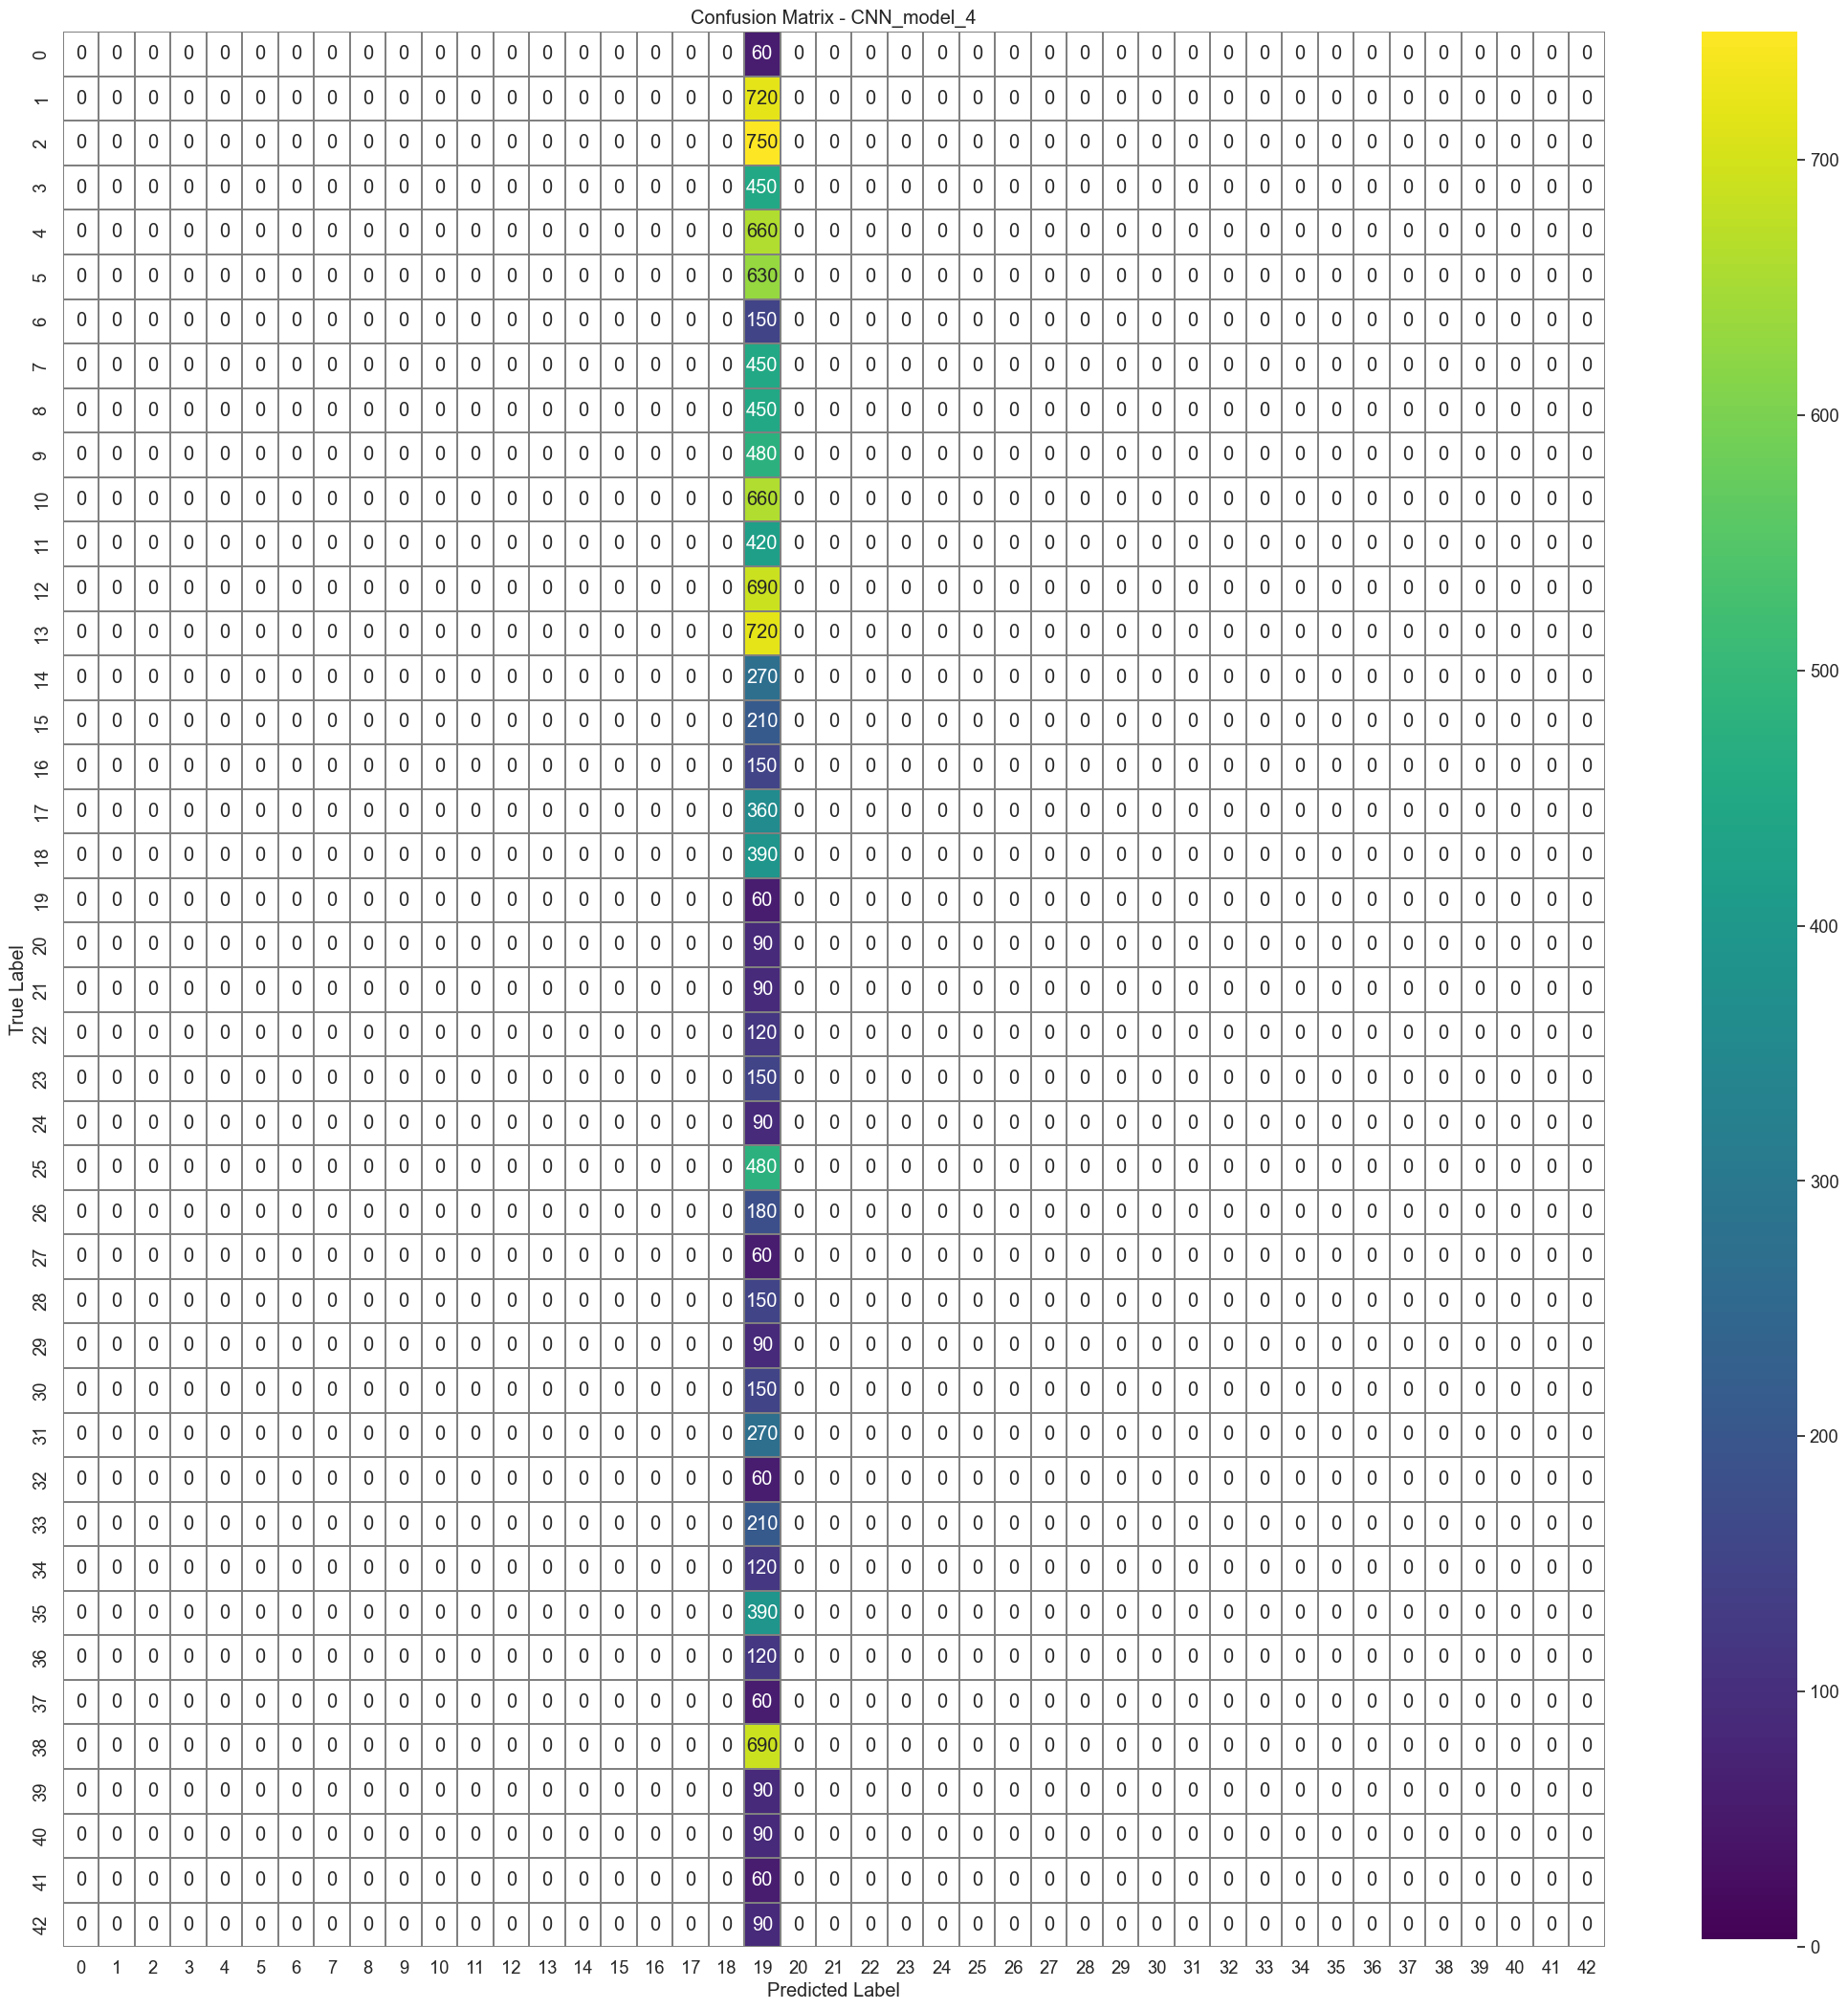

c:\Users\adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test loss: 6.9472
Test accuracy: 0.0048


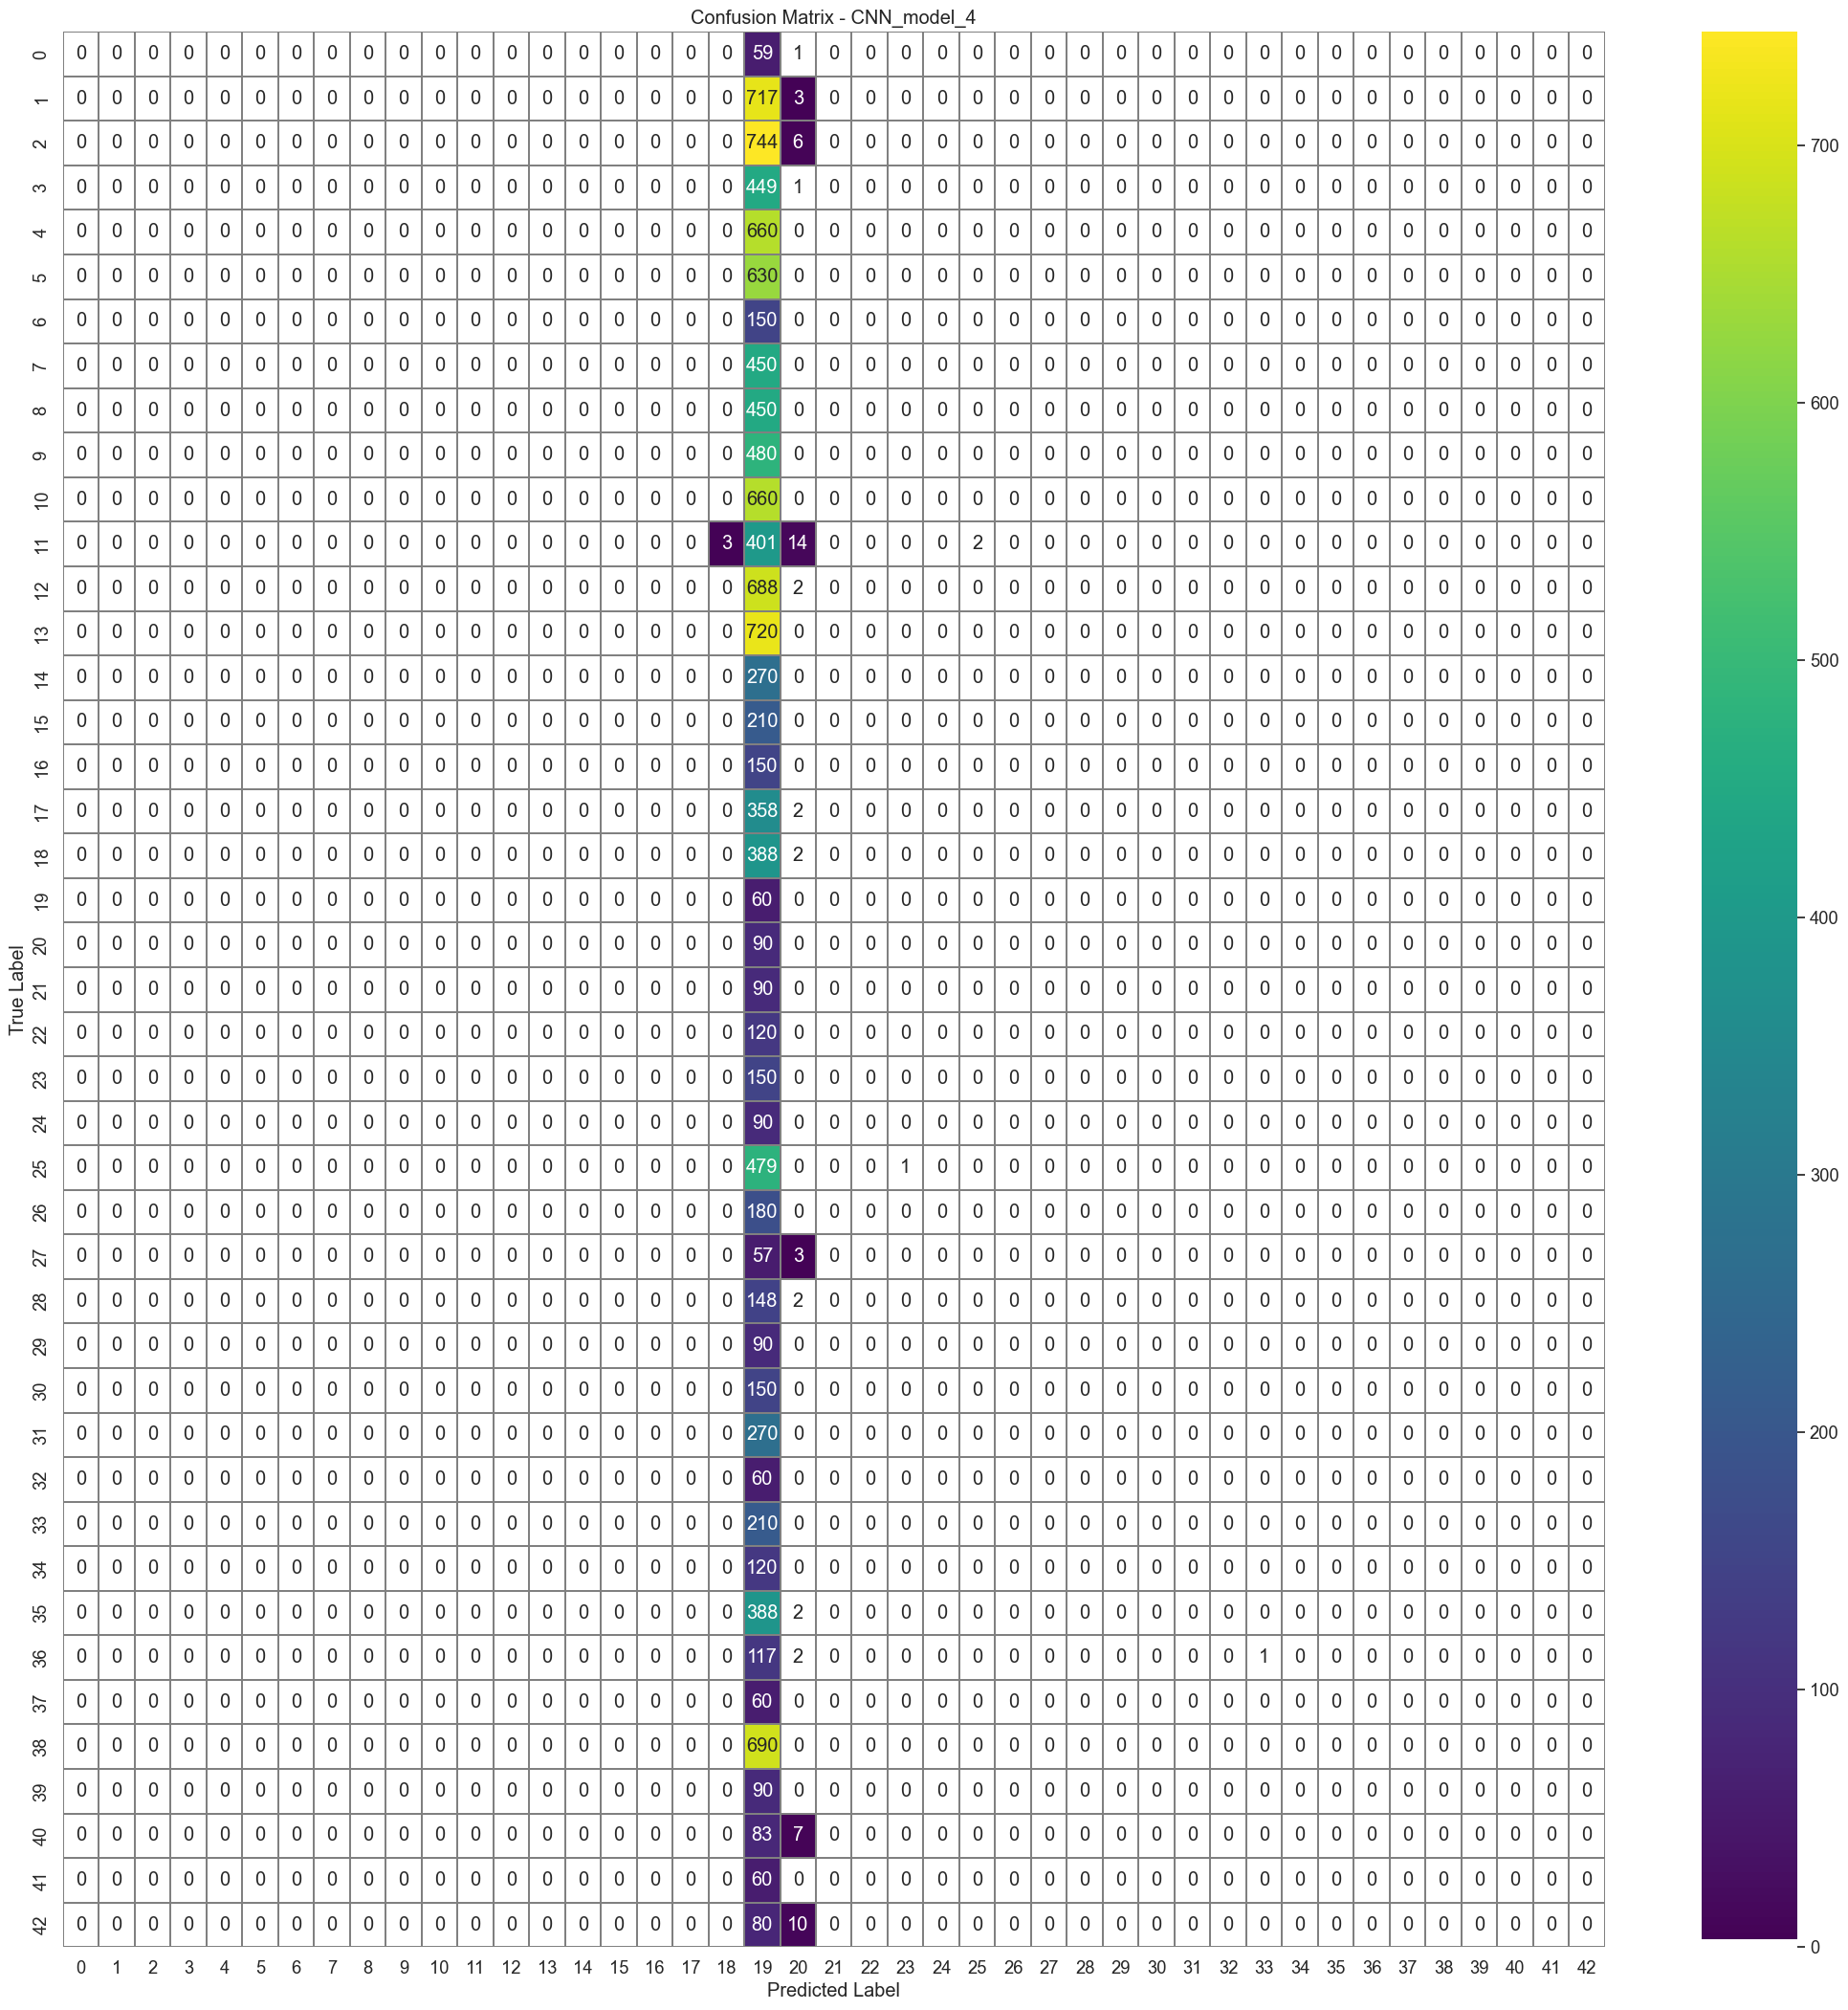

c:\Users\adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test loss: 6.8954
Test accuracy: 0.0263


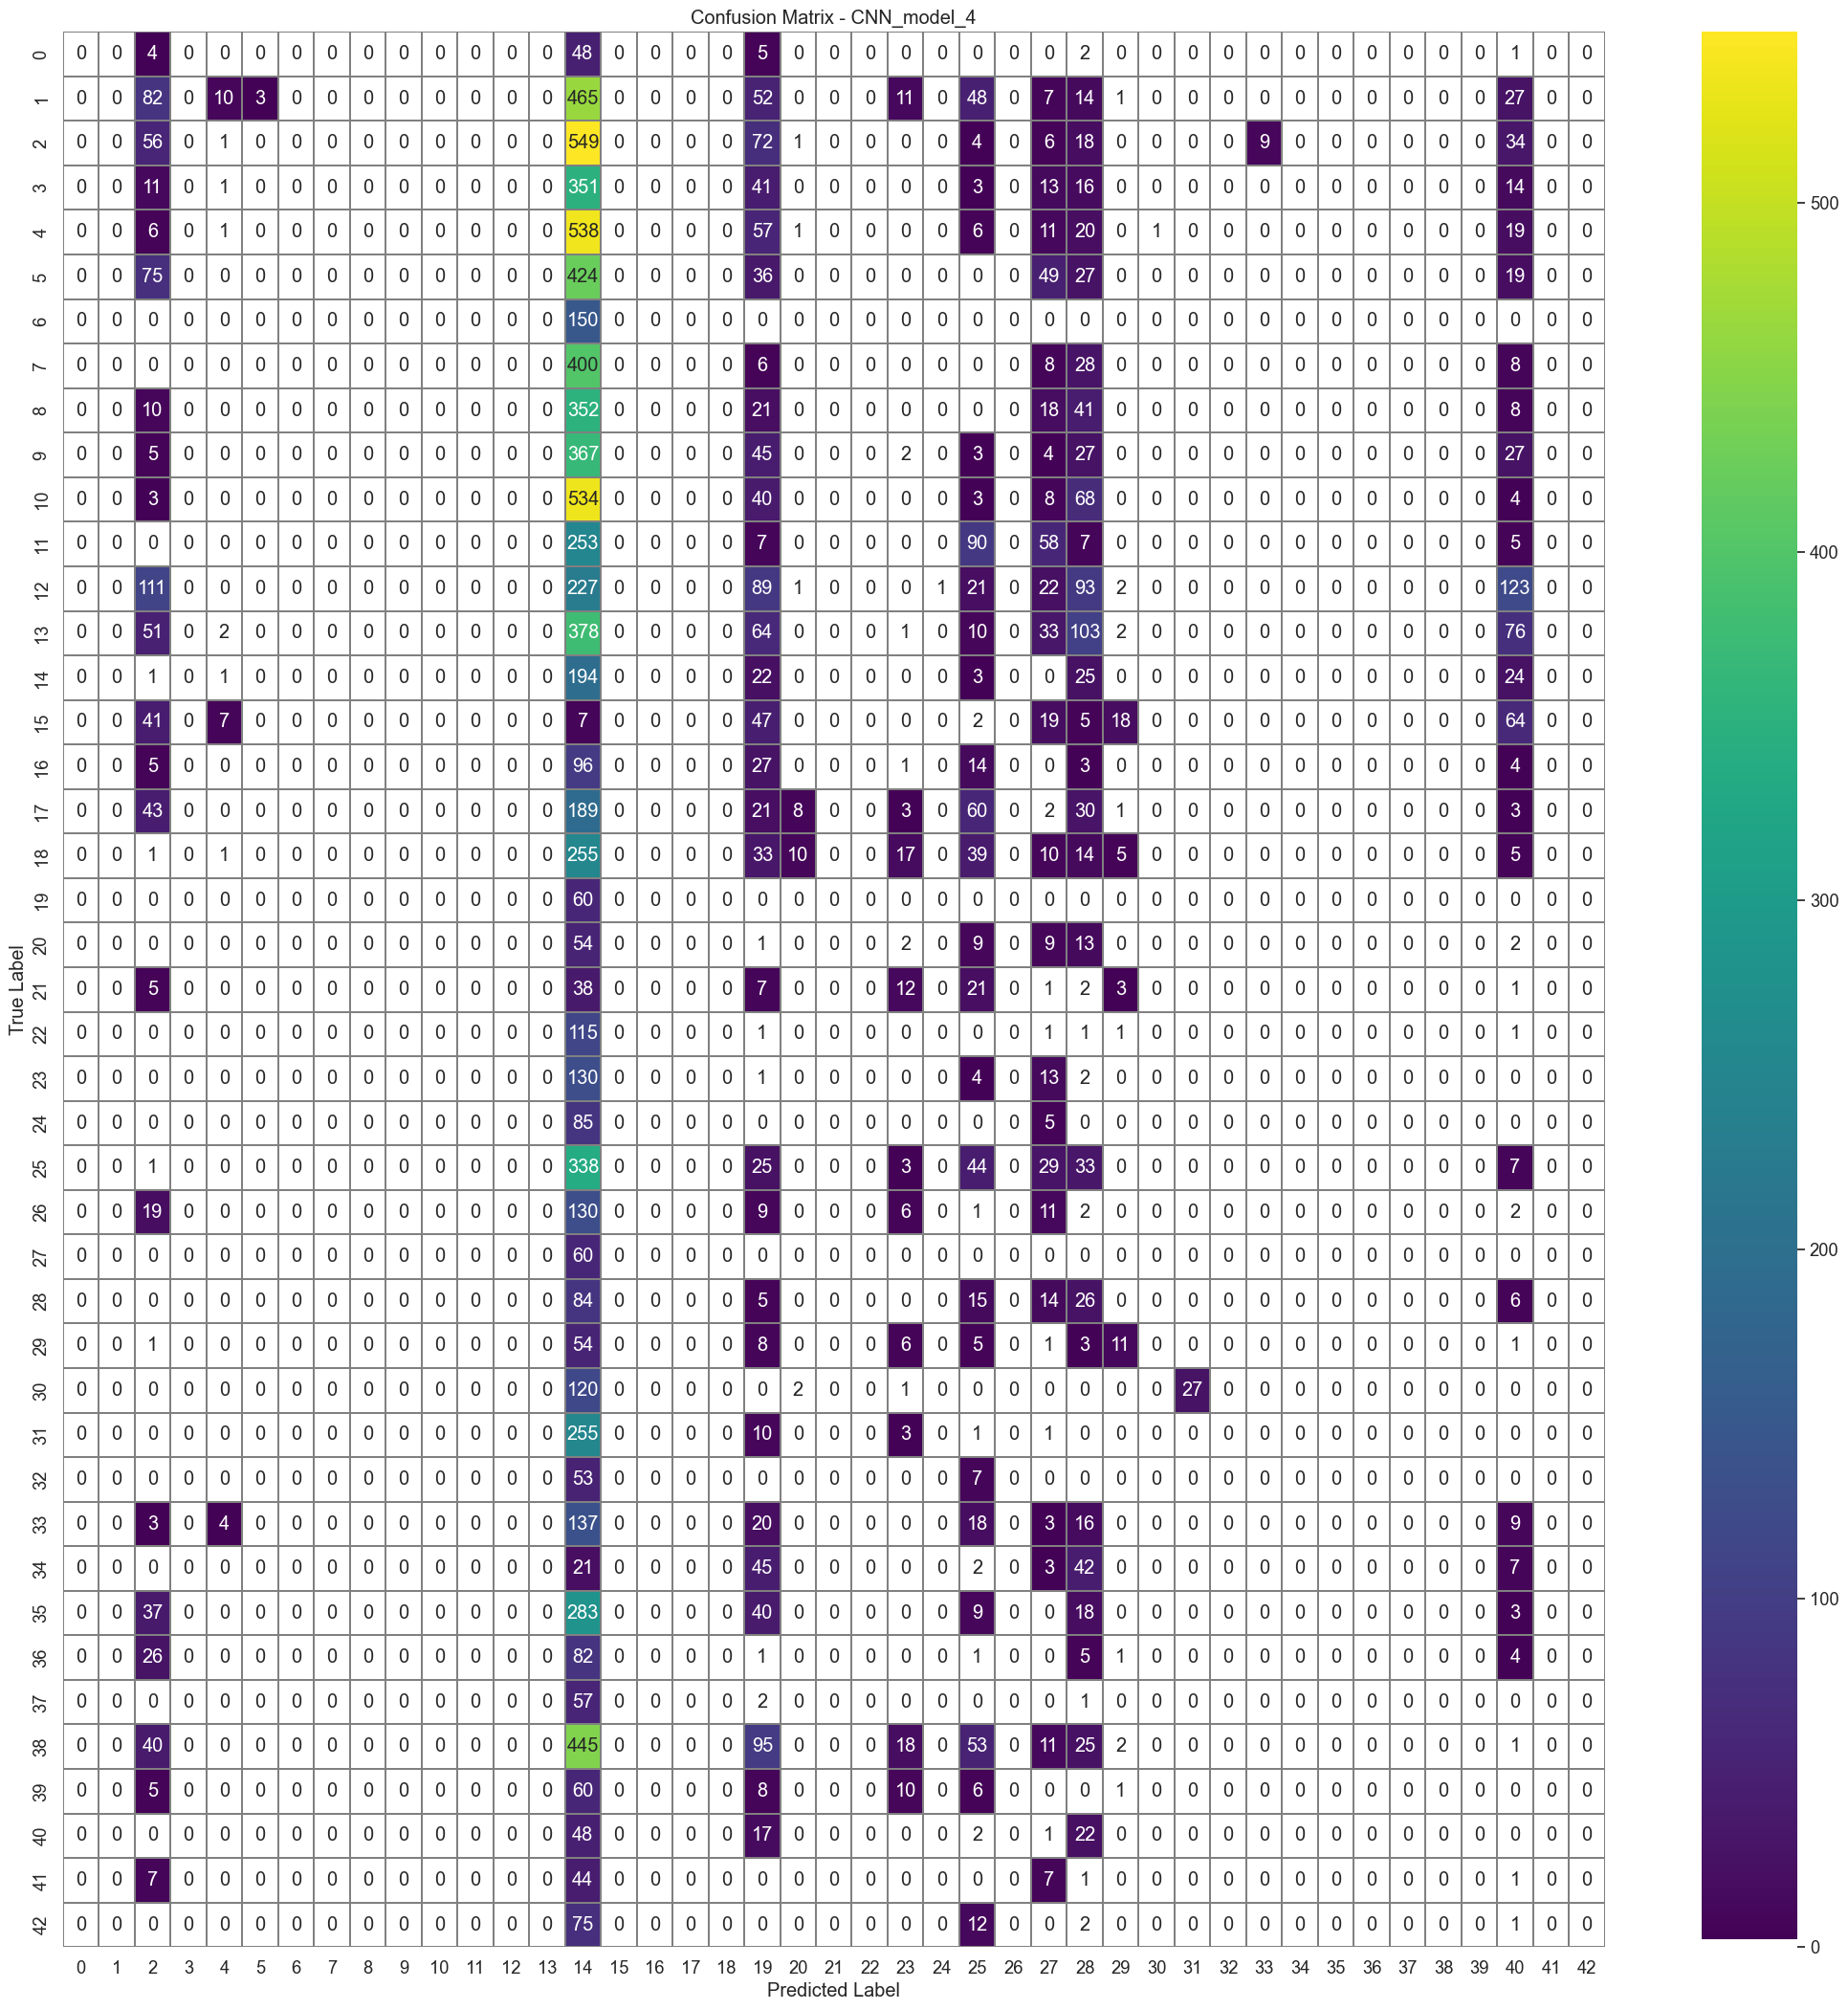

Evaluation Metrics for All Test Sets:
   Test Loss  Test Accuracy  Precision    Recall  F1 Score ROC AUC    Test Set
0   0.336610       0.946714   0.956320  0.946714  0.949149    None  Test Set 0
1   6.279837       0.004751   0.000023  0.004751  0.000045    None  Test Set 1
2   7.205713       0.004751   0.000023  0.004751  0.000045    None  Test Set 2
3   6.416335       0.026999   0.096217  0.026999  0.021299    None  Test Set 3
4   0.336604       0.946714   0.956320  0.946714  0.949149    None  Test Set 4
5   0.400565       0.927316   0.950764  0.927316  0.933922    None  Test Set 5
6   6.070642       0.004751   0.000023  0.004751  0.000045    None  Test Set 6
7   6.947182       0.004751   0.000023  0.004751  0.000045    None  Test Set 7
8   6.895405       0.026287   0.012755  0.026287  0.011017    None  Test Set 8


c:\Users\adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
# Assuming best_model_idx has been determined
best_model_idx = 4  # Replace with actual best model index
model_name = f'CNN_model_{best_model_idx}'

# Define test sets for each model
test_sets = [
    (x_test0, y_test0), (x_test1, y_test1), (x_test2, y_test2),
    (x_test3, y_test3), (x_test4, y_test4), (x_test5, y_test5),
    (x_test6, y_test6), (x_test7, y_test7), (x_test8, y_test8)
]

# Initialize a list to store metrics for each test set
all_metrics = []

# Evaluate the best model on each test set
for i, (x_test, y_test) in enumerate(test_sets):
    metrics = evaluate_CNN_model(model_name, x_test, y_test)
    metrics['Test Set'] = f'Test Set {i}'
    all_metrics.append(metrics)

# Convert the metrics to a DataFrame for better visualization
metrics_df = pd.DataFrame(all_metrics)

# Save metrics DataFrame to a CSV file
metrics_df.to_csv(os.path.join(
    'images', f'{model_name}_all_test_sets_metrics.csv'), index=False)

# Display metrics DataFrame
print("Evaluation Metrics for All Test Sets:")
print(metrics_df)

In [62]:
# Data setup
data = {
    "Test Set": ["Test Set 0", "Test Set 1", "Test Set 2", "Test Set 3", "Test Set 4", "Test Set 5", "Test Set 6", "Test Set 7", "Test Set 8"],
    "Test Loss": [0.336610, 6.279837, 7.205713, 6.416335, 0.336604, 0.400565, 6.070642, 6.947182, 6.895405],
    "Test Accuracy": [0.946714, 0.004751, 0.004751, 0.026999, 0.946714, 0.927316, 0.004751, 0.004751, 0.026287],
    "Precision": [0.956320, 0.000023, 0.000023, 0.096217, 0.956320, 0.950764, 0.000023, 0.000023, 0.012755],
    "Recall": [0.946714, 0.004751, 0.004751, 0.026999, 0.946714, 0.927316, 0.004751, 0.004751, 0.026287],
    "F1 Score": [0.949149, 0.000045, 0.000045, 0.021299, 0.949149, 0.933922, 0.000045, 0.000045, 0.011017]
}

df = pd.DataFrame(data)

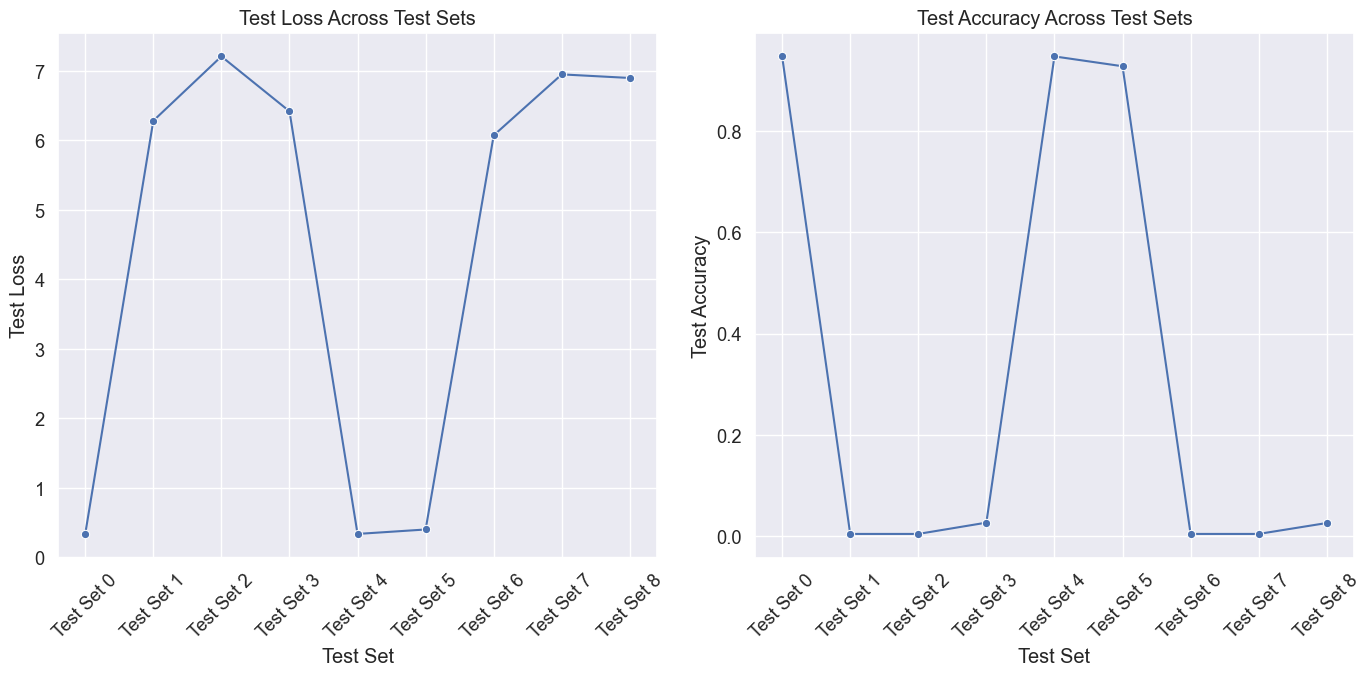

In [63]:
# Line plot for Test Loss and Accuracy
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.lineplot(data=df, x="Test Set", y="Test Loss", marker="o")
plt.title("Test Loss Across Test Sets")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(data=df, x="Test Set", y="Test Accuracy", marker="o")
plt.title("Test Accuracy Across Test Sets")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

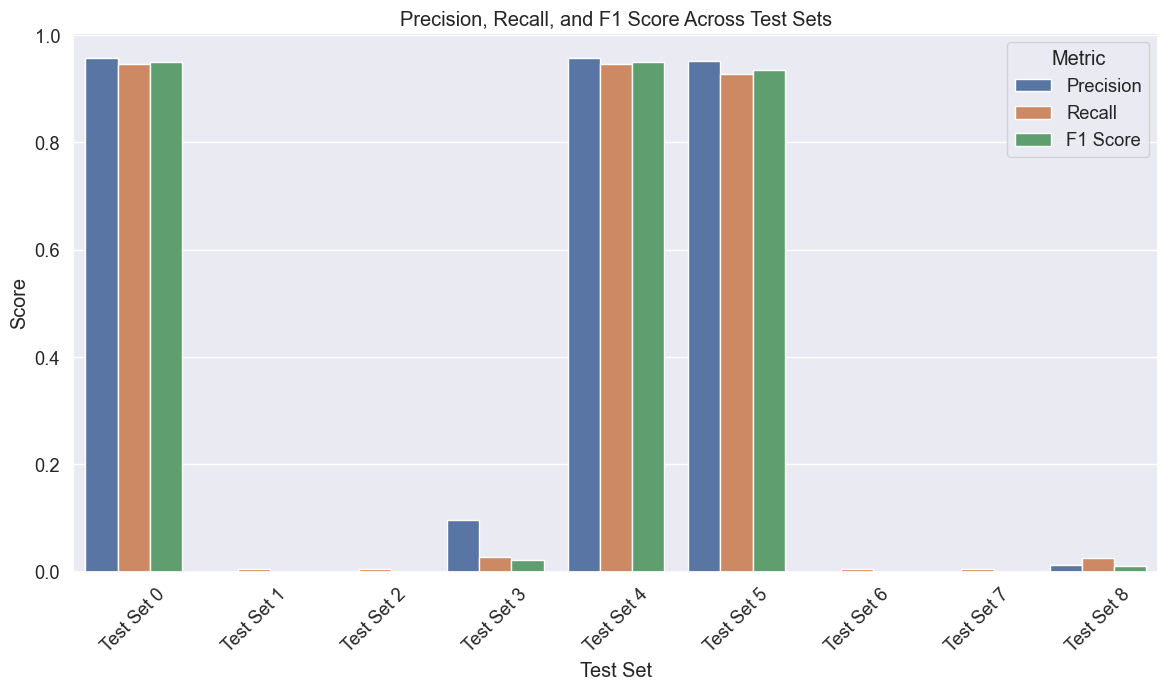

In [64]:
# Bar plot for Precision, Recall, and F1 Score
plt.figure(figsize=(14, 7))
sns.barplot(data=df.melt(id_vars="Test Set", value_vars=["Precision", "Recall", "F1 Score"]),
            x="Test Set", y="value", hue="variable")
plt.title("Precision, Recall, and F1 Score Across Test Sets")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.legend(title="Metric")
plt.show()

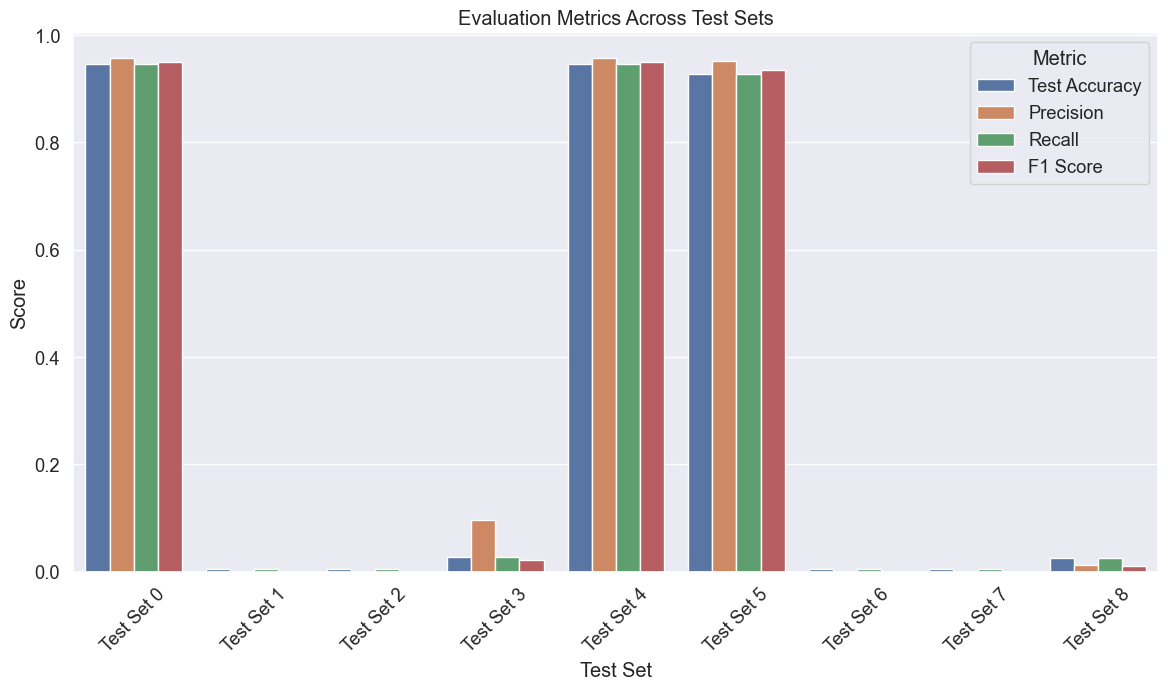

In [65]:
# Combined plot for all metrics
metrics_df = df.melt(id_vars="Test Set", value_vars=["Test Accuracy", "Precision", "Recall", "F1 Score"],
                     var_name="Metric", value_name="Score")

plt.figure(figsize=(14, 7))
sns.barplot(data=metrics_df, x="Test Set", y="Score", hue="Metric")
plt.title("Evaluation Metrics Across Test Sets")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.legend(title="Metric")
plt.show()